\# Stroke Prediction


# Title: Prediction on Stroke

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [15]:
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

stroke-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [16]:
import zipfile

# Define the path to your zip file
file_path = '/content/stroke-prediction-dataset.zip'

# Unzip the file to a specific destination
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/kaggle')

## Data

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The dataset will be imported and named to variable as data.

In [18]:
df = pd.read_csv("/content/drive/MyDrive/kaggle/stroke.csv", header=0)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Source of Data

The data is collected from the World Health Organisation (WHO) and uploaded to Kaggle where this dataset is obtained.

### Description of Data

![datadescription.jpg](datadescription.jpg)

In [19]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

The above details show the data type of each variable. We can see that this dataset contains 3 numerical variables which are the 'age', 'avg_glucose-level', and also 'bmi'. For the other variables, some are they are in categorical which they are 'gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', and 'smoking_status'.

In addition, we can know that all the variables are independent variables except for the 'stroke' attribute, it is a dependent variables, our target class. It makes sense to say stroke is a category variable because it is not discrete or continuous value.

The features 'hypertension', 'heart_disease', and 'stroke' have been encoded, with 0 representing not present and 1 representing present. 'gender', 'ever_married','work_type', 'residence_type' and 'smoking_status' will be encoded in the data preparation section. The variable 'ID' is useless and it will be dropped in the data preparation part.

In [20]:
df.shape

(5110, 12)

There are 5110 rows and 12 coloumns in the dataset.

In [21]:
numd = [feature for feature in df.columns if df[feature].dtype == 'float']
numd_df = df[numd]
print("The number of numerical attributes: ", len(numd))
print(numd)

The number of numerical attributes:  3
['age', 'avg_glucose_level', 'bmi']


In [22]:
caterd = [feature for feature in df.columns if feature not in numd and feature != 'stroke' and feature != 'id']
print("The number of categorical attributes: ", len(caterd))
print(caterd)

The number of categorical attributes:  7
['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


Above we can tell conclude that this dataset contains 3 numerical features and 7 categorical features.

### Data Cleaning

#### Dropping id

The 'id' column is dropped since it is not a relevant feature to the target variable.

In [23]:
df = df.drop(columns='id')
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


It is shown that the 'id' column is dropped.

#### Filling null value

In [24]:
#Count the empty (NaN, NAN, na) values in each column
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There are 201 missing values in the bmi column.

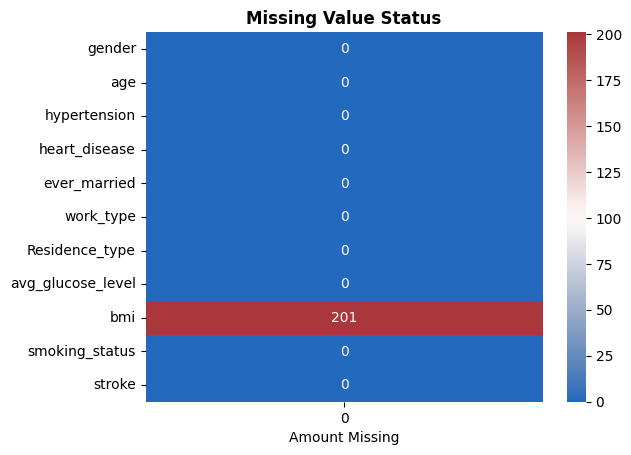

In [25]:
#DEALING WITH MISSING VALUES
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(df.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Amount Missing')
plt.savefig('null value.png')
plt.show()

Null value exists in the bmi column.  

In [26]:
#replacing Null values
mean_bmi = df['bmi'].mean()
df.fillna(mean_bmi, inplace=True)

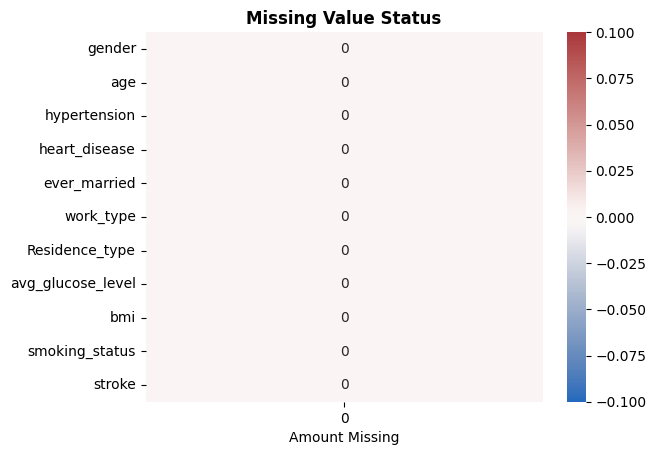

In [27]:
#DEALING WITH MISSING VALUES
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(df.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Amount Missing')
plt.savefig('cleaned null value.png')
plt.show()

It is shown that there are no more null values in the dataset.

In [28]:
#Check for duplicates
print(df.duplicated().value_counts())

False    5110
Name: count, dtype: int64


The result shows that there are no duplicated values.

#### Settling outliers

Boxplots are used to check for outliers in the numerical variables in this dataset.

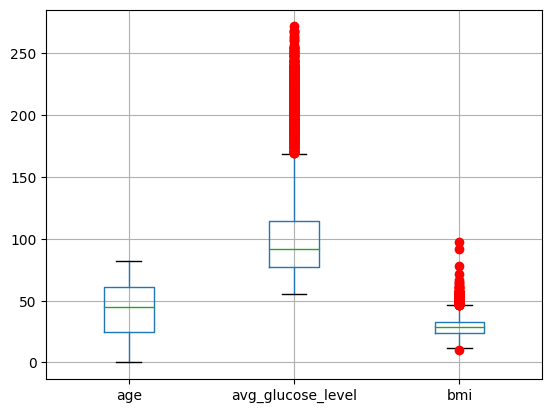

In [29]:
df.boxplot(column=['age', 'avg_glucose_level', 'bmi'], sym='r')
plt.savefig('outliers.png')

The features 'avg_glucose_level' and 'bmi' appeared to have large number of outliers where the outliers are represented by the red circles above and below the maximum and minimum range of the features. Outliers in 'avg_glucose_level' and 'bmi' will be dealt by imputing it with the median of its feature.

Minimum: 10.300000000000006
Maximum: 46.29999999999999


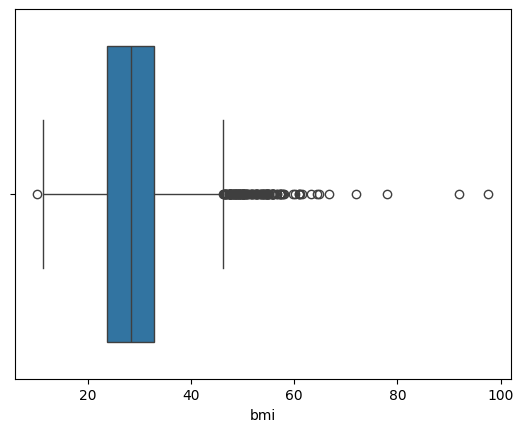

In [30]:
sns.boxplot(data = df, x = 'bmi')

Q1 = np.percentile(df['bmi'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['bmi'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
print("Minimum:", Q1 - 1.5*IQR)
print("Maximum:", Q3 + 1.5*IQR)

As from the above, it can be seen that the values of 'bmi' values exceeding 46.3 and less than 10.3 are outliers. These values are then replaced with the median.

<Axes: xlabel='bmi'>

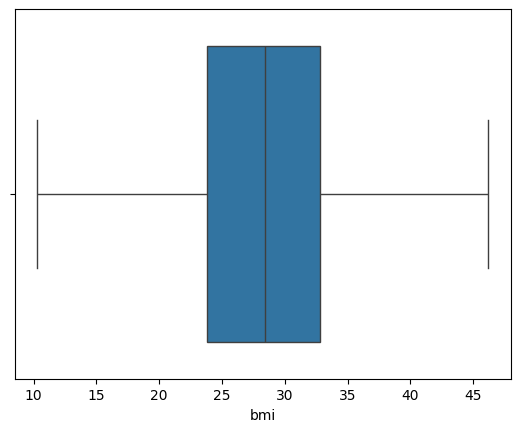

In [31]:
median_bmi = df['bmi'].median()
df["bmi"] = df["bmi"].apply(lambda x: 46.2 if x > 46.2 else x)
df["bmi"] = df["bmi"].apply(lambda x: 10.31 if x < 10.31 else x)
df["bmi"] = df["bmi"].fillna(median_bmi)
sns.boxplot(data = df, x = 'bmi')

Minimum: 21.989999999999995
Maximum: 169.35000000000002


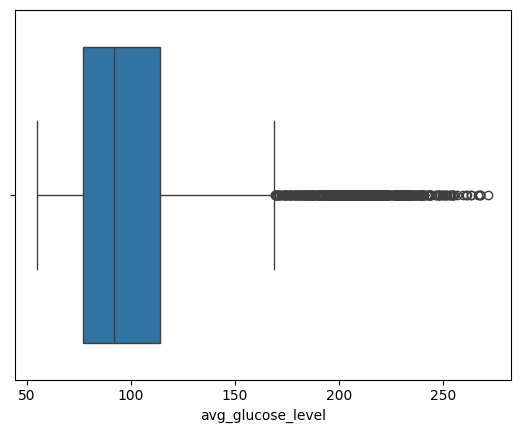

In [32]:
sns.boxplot(data = df, x = 'avg_glucose_level')

Q1 = np.percentile(df['avg_glucose_level'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['avg_glucose_level'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
print("Minimum:", Q1 - 1.5*IQR)
print("Maximum:", Q3 + 1.5*IQR)

For the feature 'avg_glucose_level', it can be seen that there are outliers where the values exceed 169.35. These values are then replaced with the median.

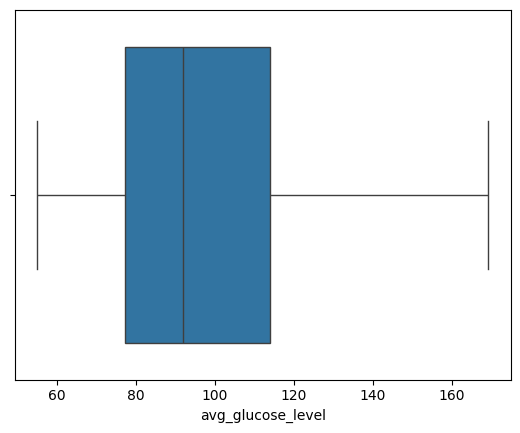

In [33]:
median_bmi = df['avg_glucose_level'].median()
df["avg_glucose_level"] = df["avg_glucose_level"].apply(lambda x: 169.3 if x > 169.3 else x)
df["avg_glucose_level"] = df["avg_glucose_level"].apply(lambda x: 21.99 if x < 21.99 else x)
df["avg_glucose_level"] = df["avg_glucose_level"].fillna(median_bmi)
sns.boxplot(data = df, x = 'avg_glucose_level')
plt.savefig('glucose_outliers.png')

### Data Preparation

#### Categories in each categorical variable

In [34]:
print('gender:', pd.unique(df['gender']))
print('ever_married:', pd.unique(df['ever_married']))
print('work_type:', pd.unique(df['work_type']))
print('Residence_type:', pd.unique(df['Residence_type']))
print('smoking_status:', pd.unique(df['smoking_status']))

gender: ['Male' 'Female' 'Other']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


#### Removing 'Other' in gender

For 'gender', the data "Others" may create outliers for the ML. Hence, there is a need to check the number of records which contain this value.

In [35]:
df[df['gender'] == 'Other'].count()

gender               1
age                  1
hypertension         1
heart_disease        1
ever_married         1
work_type            1
Residence_type       1
avg_glucose_level    1
bmi                  1
smoking_status       1
stroke               1
dtype: int64

The number of record containing 'Other' value in the 'gender' feature is found to be 1. This record will be dropped.

In [36]:
data_delete = df[df['gender'] == 'Other'].index
df = df.drop(data_delete)

df.groupby(['gender', 'stroke'])['stroke'].count()

gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
Name: stroke, dtype: int64

Now, the 'gender' feature is only left with values of 'Male' and 'Female'.

### Statistics of the Data

In [37]:
numerical_features = df[['age', 'avg_glucose_level', 'bmi']]
numerical_features_stats = numerical_features.describe()
numerical_features_stats

,age,avg_glucose_level,bmi
count,5109.000000,5109.000000,5109.000000
mean,43.229986,100.980861,28.720405
std,22.613575,33.198179,7.114056
min,0.080000,55.120000,10.310000
25%,25.000000,77.240000,23.800000
50%,45.000000,91.880000,28.400000
75%,61.000000,114.090000,32.800000
max,82.000000,169.300000,46.200000


The mean shows that the average age is at 43 years old. Moving on, the mean for average glucose level is 101 which indicates a normal blood sugar level. Lastly, the mean for bmi is 28.72 which indicates overweight.

#### Frequency Distribution of Categorical Variable

In [43]:
#Get a count of the number of '1' and '0' for stroke
df['stroke'].value_counts()

stroke
0    4860
1     249
Name: count, dtype: int64

There are 4861 individuals which does not have stroke and 249 individuals who have stroke.

In [44]:
#Get a count of the number of '1' and '0' for hypertension
df['hypertension'].value_counts()

hypertension
0    4611
1     498
Name: count, dtype: int64

There are 4612 individuals which does not have hypertension and 498 individuals who have hypertension.

In [45]:
#Get a count of the number of '1' and '0' for heart disease
df['heart_disease'].value_counts()

heart_disease
0    4833
1     276
Name: count, dtype: int64

There are 4834 individuals who does not have heart disease and 276 individuals who have heart disease.

In [46]:
#Frequency table of smoking status
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64

There are 1892 individuals who have never smoked, 885 individuals who have formerly smoked, 789 individuals who are currently smoking and 1544 individuals with unknown smoking status

In [47]:
#Frequency table of genders
df['gender'].value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

This shows that there are 2994 females, and 2115 males in this dataset.

In [48]:
#Frequency table of work types
df['work_type'].value_counts()

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

There are 2925 individuals who are working with private companies, 819 individuals who are self-employed, 687 individuals who are taking care of children, 657 individuals who are working for government and 22 individuals who have never worked.

In [49]:
#Frequency table of residence types
df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2513
Name: count, dtype: int64

This shows that there are 2596 individuals who stay in urban area, and 2514 individuals who stay in rural area in this dataset.

In [50]:
#Frequency table of work types
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1756
Name: count, dtype: int64

This shows that there are 3353 individuals who have ever married, and 1757 individuals who have not married this dataset.

### Visualisation of data

#### Frequency Distribution of stroke in Histogram

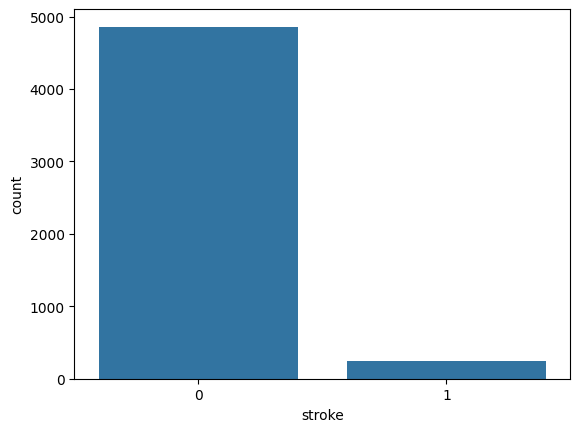

In [51]:
sns.countplot(x='stroke', data=df)
plt.savefig('stroke_bar.jpg')

Above is the distribution of the target variable, Stroke, shown in the histogram.

#### Frequency Distribution of gender

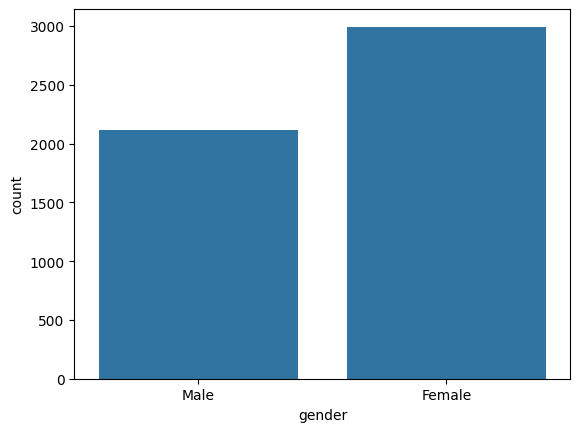

In [54]:

sns.countplot(x='gender', data=df)
plt.show()

#### Number of counts in each categorical attributes

Here, bar chart is generated to visualize the different between the number of count on female and male in this dataset. from this, we can notice that there are only male and female involve in this dataset.

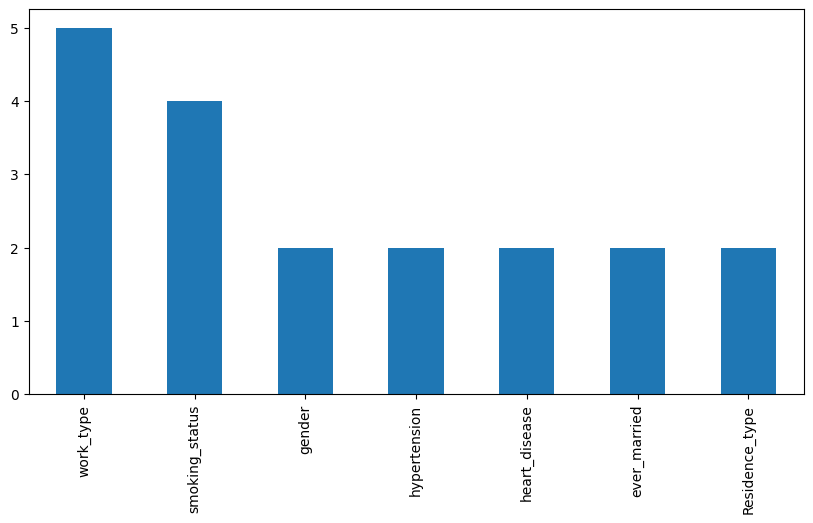

In [55]:
df[caterd].nunique().sort_values(ascending = False).plot.bar(figsize = (10, 5))
plt.savefig('categorical_bar.jpg')
plt.show()

The plot above tells the number of category each categorical variable has. We know that work_type contains the most categories which is 5 categories.

#### Distribution plot of Age

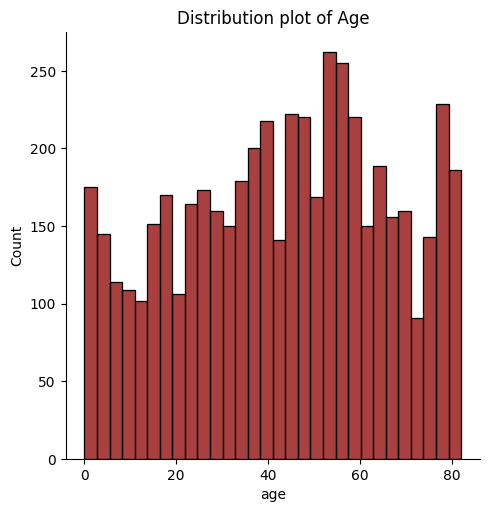

In [56]:
sns.displot(df['age'].dropna(),kde=False,color='darkred',bins=30)
plt.title("Distribution plot of Age")
plt.show()

To have a better understanding on the number of individuals according to their age, a distribution plot is implemented. For instance, there are around 740 individuals between the ages of 50-60 years old.

#### Skewness of data

Below shows the distribution of the numerical data after filling in the null value and handling the outliers.

In [57]:
def plot_hist(col, bins=30, title="",xlabel="",ax=None):
    sns.distplot(col, bins=bins,ax=ax)
    ax.set_title(f'Histogram of {title}',fontsize=20)
    ax.set_xlabel(xlabel)

<ipython-input-57-ae4f023a73f5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(col, bins=bins,ax=ax)
<ipython-input-57-ae4f023a73f5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(col, bins=bins,ax=ax)
<ipython-input-57-ae4f023a73f5>:2: UserWarning: 

`distplot` is a deprecated function and 

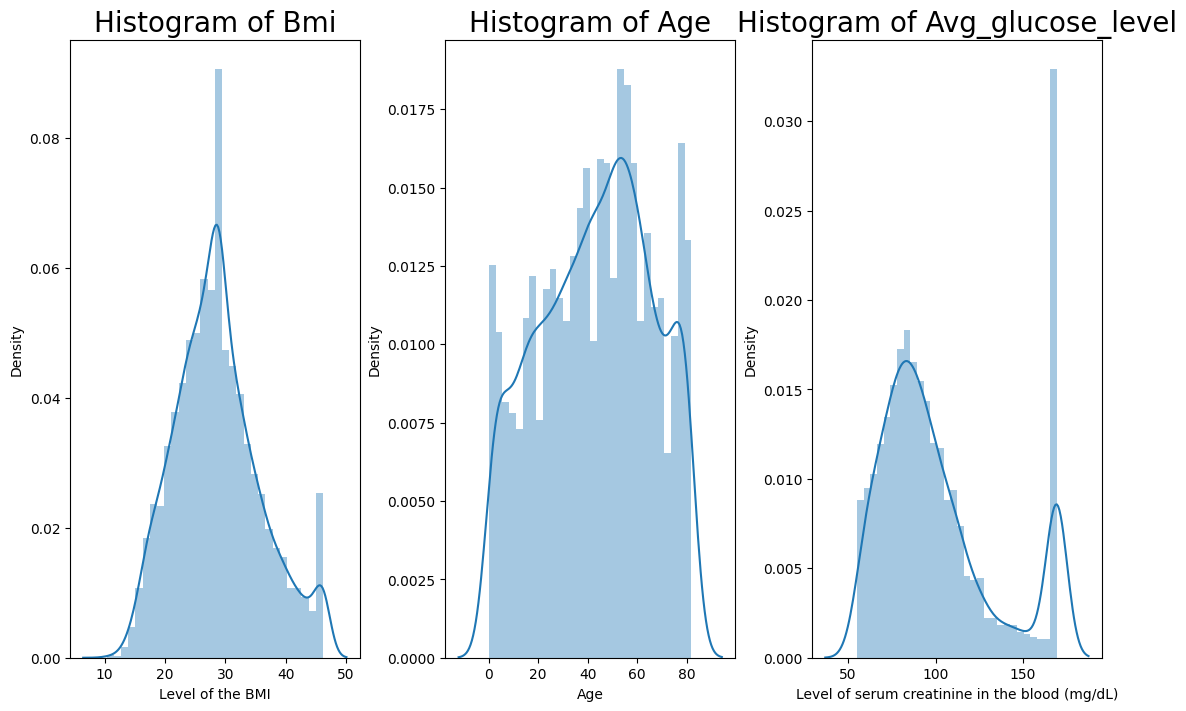

In [58]:
fig, axes = plt.subplots(1,3,figsize=(11,7),constrained_layout=True)
plot_hist(df.bmi,
          title='Bmi',
          xlabel="Level of the BMI",
          ax=axes[0])
plot_hist(df.age,
          bins=30,
          title='Age',
          xlabel='Age',
          ax=axes[1])
plot_hist(df.avg_glucose_level,
          title='Avg_glucose_level',
          xlabel='Level of serum creatinine in the blood (mg/dL)',
          ax=axes[2])

plt.savefig('numericaldistribution_stats.png')
plt.show()

In [59]:
df[numd].skew()

age                 -0.137430
avg_glucose_level    0.935216
bmi                  0.431847
dtype: float64

The distribution of the numerical attributess are shown in the histograms above. From the histograms above, we can find out that all the numerical attributes distribution are different, avg_glucose_level and bmi are skewed to the right and distribution of age is skewed negatively.

#### Hypothesis Tests for Normality

In [64]:
from scipy import stats
# let's contruct a function
def shapiro_wilk_test(cols, alpha=0.05):
    # test the null hypothesis for columns given in `cols` of the dataframe `df` under significance level `alpha`.
    for col in cols:
        w, p = stats.shapiro(df[numd])
        if p <= alpha:
            print(f"Rejected H0 under significance level {alpha}")
            print(f"{col} differs significantly from a normal distribution (W={w:.3f}, p={p:.5f})\n")
        else:
            print(f"\nFail to reject H0 due to lack of evidence under significance level {alpha}\n")
            print(f"{col} seem to be normally distributed (W={w:.3f}, p={p:.5f})")

In [63]:
shapiro_wilk_test(numd)

Rejected H0 under significance level 0.05
age differs significantly from a normal distribution (W=0.894, p=0.00000)

Rejected H0 under significance level 0.05
avg_glucose_level differs significantly from a normal distribution (W=0.894, p=0.00000)

Rejected H0 under significance level 0.05
bmi differs significantly from a normal distribution (W=0.894, p=0.00000)



/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


We are able to conclude that the numerical attributes in the data are not normally distributed

#### Frequency Distribution of Categorical Variable in Histogram

The number of records for each categorical variable except 'id' is shown in the barcharts below.

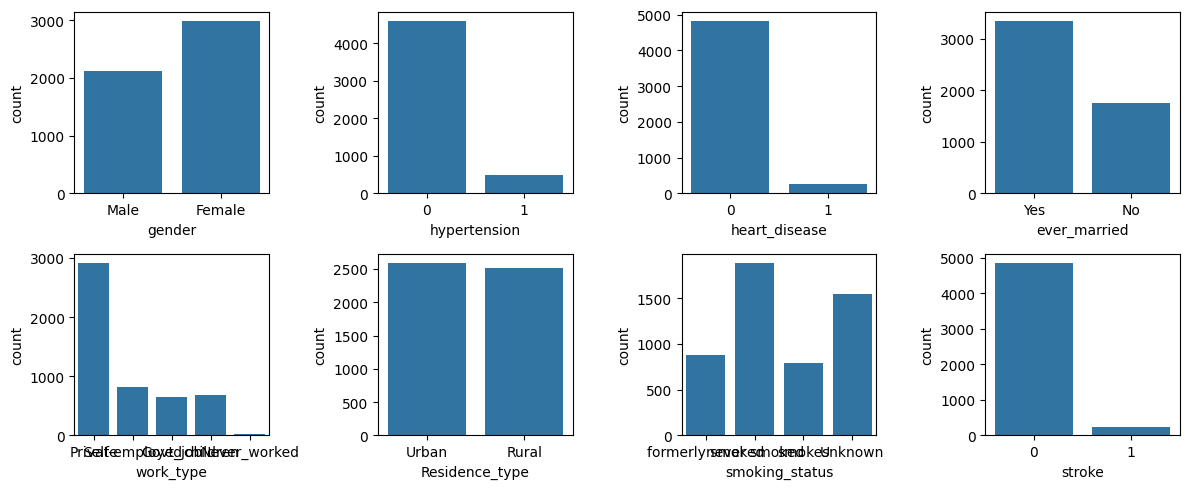

In [62]:
fig, ax = plt.subplots(2, 4, figsize=(12, 5))
sns.countplot(data=df, x='gender', ax=ax[0][0])
sns.countplot(data=df, x='hypertension', ax=ax[0][1])
sns.countplot(data=df, x='heart_disease', ax=ax[0][2])
sns.countplot(data=df, x='ever_married', ax=ax[0][3])
sns.countplot(data=df, x='work_type', ax=ax[1][0])
sns.countplot(data=df, x='Residence_type', ax=ax[1][1])
sns.countplot(data=df, x='smoking_status', ax=ax[1][2])
sns.countplot(data=df, x='stroke', ax=ax[1][3])
plt.tight_layout()
plt.savefig('cat_variable_bar.jpg')
plt.show()

It is obvious that most variables show a degree of class imbalance, which also includes the target variable 'stroke'. This will then be handled in the class imbalnce section as imbalanced data will affect the accuracy of the model whereby the focus will be on the majority class and the minority class will be failed to be presented accurately.

#### Distribution of Strokes in Pie Chart

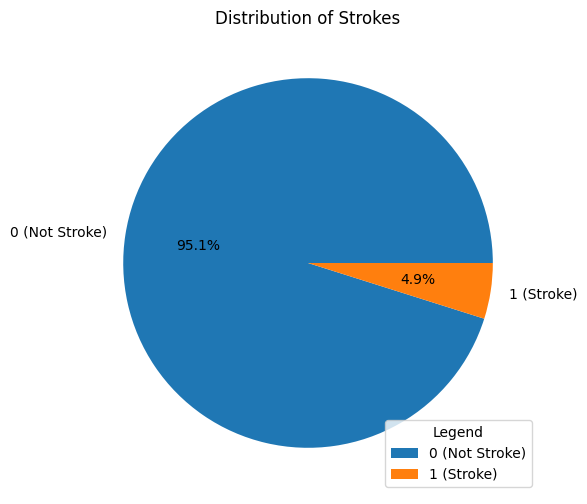

In [61]:
f, (ax1) = plt.subplots(1, figsize=(12,6))

ax1.pie(x=df['stroke'].value_counts(), labels=df['stroke'].value_counts().index.map({0:'0 (Not Stroke)', 1:'1 (Stroke)'}), autopct='%1.1f%%')
ax1.legend(
    title='Legend',
    loc = 'lower right')
ax1.set_title('Distribution of Strokes')
plt.savefig('pie_chart.png')

Here is a diagram showing the number of people with stroke and without in a pie chart.

## Methods

### Data Transformation

#### Encoding

Encoding will be applied to the categorical features which are not encoded yet which are 'gender', 'ever_married', 'work_type', 'Residence_type', and 'smoking_status'. This is done by using the LabelEncoder from sklearn's preprocessing library.

In [65]:
df.rename(columns={'Residence_type':'residence_type'}, inplace=True)

In [66]:
from sklearn.preprocessing import LabelEncoder
gender_encoder = LabelEncoder()
married_encoder = LabelEncoder()
work_encoder = LabelEncoder()
residence_encoder = LabelEncoder()
smoking_encoder = LabelEncoder()

gender_encoder.fit(df['gender'])
married_encoder.fit(df['ever_married'])
work_encoder.fit(df['work_type'])
residence_encoder.fit(df['residence_type'])
smoking_encoder.fit(df['smoking_status'])

df['gender'] =  gender_encoder.transform(df['gender'])
df['ever_married'] =  married_encoder.transform(df['ever_married'])
df['work_type'] =  work_encoder.transform(df['work_type'])
df['residence_type'] =  residence_encoder.transform(df['residence_type'])
df['smoking_status'] =  smoking_encoder.transform(df['smoking_status'])

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,169.30,36.600000,1,1
1,0,61.0,0,0,1,3,0,169.30,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,169.30,34.400000,3,1
4,0,79.0,1,0,1,3,0,169.30,24.000000,2,1


In [67]:
df_rus = pd.DataFrame(df)
print(type(df_rus))
print(df_rus.head())

<class 'pandas.core.frame.DataFrame'>
   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   

   residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             169.30  36.600000               1       1  
1               0             169.30  28.893237               2       1  
2               0             105.92  32.500000               2       1  
3               1             169.30  34.400000               3       1  
4               0             169.30  24.000000               2       1  


In [68]:
df_smote = pd.DataFrame(df)
print(type(df_smote))
print(df_smote.head())

<class 'pandas.core.frame.DataFrame'>
   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   

   residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             169.30  36.600000               1       1  
1               0             169.30  28.893237               2       1  
2               0             105.92  32.500000               2       1  
3               1             169.30  34.400000               3       1  
4               0             169.30  24.000000               2       1  


As seen from the above, all the features are now in numerical form in preparation to be used in building a prediction model.

The encoded values represent as follows :

In [69]:
gender_name_mapping = dict(zip(gender_encoder.classes_, gender_encoder.transform(gender_encoder.classes_)))
married_name_mapping = dict(zip(married_encoder.classes_, married_encoder.transform(married_encoder.classes_)))
work_name_mapping = dict(zip(work_encoder.classes_, work_encoder.transform(work_encoder.classes_)))
residence_name_mapping = dict(zip(residence_encoder.classes_, residence_encoder.transform(residence_encoder.classes_)))
smoking_name_mapping = dict(zip(smoking_encoder.classes_, smoking_encoder.transform(smoking_encoder.classes_)))

print("gender        :", gender_name_mapping)
print("ever_married  :", married_name_mapping)
print("work_type     :", work_name_mapping)
print("residence_type:", residence_name_mapping)
print("smoking_status:", smoking_name_mapping)

gender        : {'Female': 0, 'Male': 1}
ever_married  : {'No': 0, 'Yes': 1}
work_type     : {'Govt_job': 0, 'Never_worked': 1, 'Private': 2, 'Self-employed': 3, 'children': 4}
residence_type: {'Rural': 0, 'Urban': 1}
smoking_status: {'Unknown': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3}


In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exploratory Data Analysis

### Numerical Variable Analysis

<ipython-input-71-e2f7a1dd06d3>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
<ipython-input-71-e2f7a1dd06d3>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
<ipython-input-71-e2f7a1dd06d3>:30: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
<ipython-input-71-e2f7a1dd06d3>:40: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
<ipython-input-71-e2f7a1dd06d3>:54: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please 

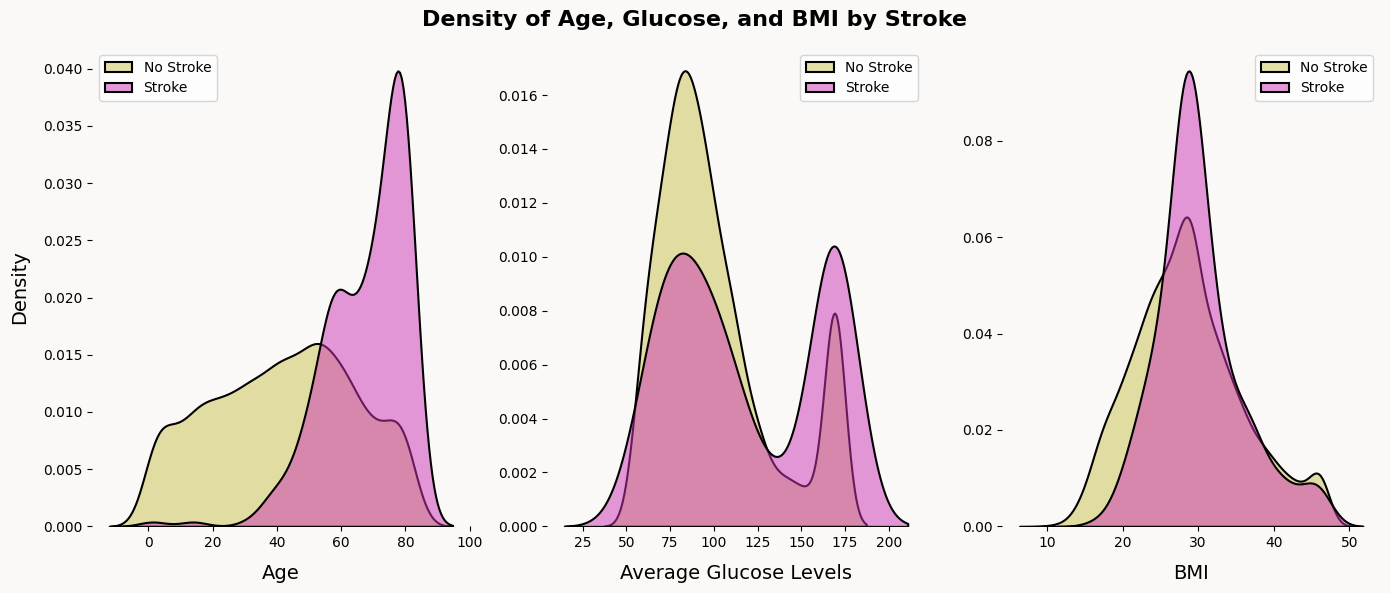

In [71]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14,6))
fig.patch.set_facecolor('#faf9f7')

for i in (ax1, ax2, ax3):
    i.set_facecolor('#faf9f7')

sns.kdeplot(
    df['age'][df['stroke'] == 0],
    ax = ax1,
    color = "#c8c14f",
    shade = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)

sns.kdeplot(
    df['age'][df['stroke'] == 1],
    ax = ax1,
    color = "#cd34b5",
    shade = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)
ax1.legend(['No Stroke', 'Stroke'], loc = 'upper left')
ax1.set_xlabel('Age', fontsize = 14, labelpad = 10)
ax1.set_ylabel('Density', fontsize = 14, labelpad = 10)

sns.kdeplot(
    df['avg_glucose_level'][df['stroke'] == 0],
    ax = ax2,
    color = "#c8c14f",
    shade = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)

sns.kdeplot(
    df['avg_glucose_level'][df['stroke'] == 1],
    ax = ax2,
    color = "#cd34b5",
    shade = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)

ax2.legend(['No Stroke', 'Stroke'])
ax2.set_xlabel('Average Glucose Levels', fontsize = 14, labelpad = 10)
ax2.set_ylabel('')

sns.kdeplot(
    df['bmi'][df['stroke'] == 0],
    ax = ax3,
    color = "#c8c14f",
    shade = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)

sns.kdeplot(
    df['bmi'][df['stroke'] == 1],
    ax = ax3,
    color = "#cd34b5",
    shade = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)

ax3.legend(['No Stroke', 'Stroke'])
ax3.set_xlabel('BMI', fontsize = 14, labelpad = 10)
ax3.set_ylabel('')

plt.suptitle('Density of Age, Glucose, and BMI by Stroke', fontsize = 16, fontweight = 'bold')

for i in (ax1, ax2, ax3):
    for j in ['top', 'left', 'bottom', 'right']:
        i.spines[j].set_visible(False)

plt.savefig('Numerical_distribution.jpg')
fig.tight_layout()

### Bivariate Analysis

#### Hypertension and Stroke

In [72]:
print (f'A person with hypertension has a probability of {round(df[df["hypertension"]==1]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person without hypertension has a probability of  {round(df[df["hypertension"]==0]["stroke"].mean()*100,2)} % get a stroke')

A person with hypertension has a probability of 13.25 % get a stroke

A person without hypertension has a probability of  3.97 % get a stroke


As we have seen, stroke probability for those who has hypertension are quite different than for those who don't. Their percentage is 13.25% and 3.97% respectively. It means that person with hypertension are almost 3.3 time more likely to get stroke than the ones who don't have hypertension.

#### Gender and Stroke

In [73]:
print (f'A female person has a probability of {round(df[df["gender"]==0]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A male person has a probability of {round(df[df["gender"]==1]["stroke"].mean()*100,2)} % get a stroke')

print()

A female person has a probability of 4.71 % get a stroke

A male person has a probability of 5.11 % get a stroke



Male compare to female are more likelyto get stroke, but difference between female and male is very small.

#### Heart Disease and Stroke

In [74]:
print (f'A person with heart disease has a probability of {round(df[df["heart_disease"]==1]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person without heart disease has a probability of {round(df[df["heart_disease"]==0]["stroke"].mean()*100,2)} % get a stroke')

A person with heart disease has a probability of 17.03 % get a stroke

A person without heart disease has a probability of 4.18 % get a stroke


As we have seen, stroke probability for those who has heart disease are quite different than for those who don't. A person with heart disease has a probability of 17.03% of getting a stroke while a person without heart disease has a probability of 4.18% in getting a stroke. It means that person with heart diease are 4.07 times more likely to get stroke than the ones who don't have heart disease.

#### Married Status and Stroke

In [75]:
print (f'A person married (or married before) has a probability of {round(df[df["ever_married"]==1]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person never married has a probability of {round(df[df["ever_married"]==0]["stroke"].mean()*100,2)} % get a stroke')

A person married (or married before) has a probability of 6.56 % get a stroke

A person never married has a probability of 1.65 % get a stroke


As we have seen, stroke probability for those who has marriage history are quite different than for those who don't. A person with marriage history has a probability of 6.56% of getting a stroke while a person without marriage history has a probability of 1.65% in getting a stroke. It means that person is married(or married before) are 5.7 times more likely to get stroke than the ones who don't have marriage history.

#### Work Type and Stroke

In [76]:
print (f'A person with private work type has a probability of {round(df[df["work_type"]==2]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'Self-employed person has a probability of {round(df[df["work_type"]==3]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person with a goverment job has a probability of {round(df[df["work_type"]==0]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A child has a probability of {round(df[df["work_type"]==4]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person never worked has a probability of {round(df[df["work_type"]==1]["stroke"].mean()*100,2)} % get a stroke')

A person with private work type has a probability of 5.1 % get a stroke

Self-employed person has a probability of 7.94 % get a stroke

A person with a goverment job has a probability of 5.02 % get a stroke

A child has a probability of 0.29 % get a stroke

A person never worked has a probability of 0.0 % get a stroke


Self employed person has more probability to get stroke than other work type. Person with private job and goverment job almost has same probability to get stroke.

#### Residence Type and Stroke

In [77]:
print (f'A person, who lives in urban area, has a probability of {round(df[df["residence_type"]==1]["stroke"].mean()*100,2)} %  get a stroke')

print()

print (f'A person, who lives in rural area, has a probability of {round(df[df["residence_type"]==0]["stroke"].mean()*100,2)} % get a stroke')

A person, who lives in urban area, has a probability of 5.2 %  get a stroke

A person, who lives in rural area, has a probability of 4.54 % get a stroke


As seen, there is not much difference between person residence type. Person who lives in rural area slightly has more probablity to get sroke than a person who lives in rural area. However, the difference is small.

#### Smoking Status and Stroke

In [78]:
print (f'A formerly smoked person has a probability of {round(df[df["smoking_status"]==1]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person never smoked has a probability of {round(df[df["smoking_status"]==2]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person smokes has a probability of {round(df[df["smoking_status"]==3]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person whom smoking history is not known,has a probability of {round(df[df["smoking_status"]==0]["stroke"].mean()*100,2)} % get a stroke')

print()

A formerly smoked person has a probability of 7.92 % get a stroke

A person never smoked has a probability of 4.76 % get a stroke

A person smokes has a probability of 5.32 % get a stroke

A person whom smoking history is not known,has a probability of 3.04 % get a stroke



There are differeneces based on the smoking status. A formerly smoked person has a probability to get stroke 1.66 times more than person who has never smoked. A person who smokes has a a probability to get stroke 1.11 times more than person who never smoked. It is smal difference between who smokes and who does not smoke in regard to probability of getting stroke.

### Gender vs Age

In [79]:
df.groupby('gender')['age'].mean()

gender
0    43.757395
1    42.483385
Name: age, dtype: float64

Below shows the mean of age grouped by gender. The average age of female in the dataset is 43.7 while the average age of male in the dataset is 42.5

### Gender vs Stroke

In [80]:
df.groupby('stroke')['age'].mean()

stroke
0    41.974831
1    67.728193
Name: age, dtype: float64

Below shows the mean of age grouped by stroke. The average age for an individual be at risk of stroke is 67.7.

### Pearson Correlation

The correlation matrix on numerical attributes is plotted.

In [81]:
df.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.027752,0.021223,0.085685,-0.030171,0.056576,-0.006105,0.054071,-0.023405,-0.062423,0.009081
age,-0.027752,1.000000,0.276367,0.263777,0.679084,-0.361686,0.014031,0.199883,0.353047,0.265165,0.245239
hypertension,0.021223,0.276367,1.000000,0.108292,0.164187,-0.051772,-0.007980,0.156873,0.156562,0.111018,0.127891
heart_disease,0.085685,0.263777,0.108292,1.000000,0.114601,-0.028031,0.003045,0.139825,0.046868,0.048445,0.134905
ever_married,-0.030171,0.679084,0.164187,0.114601,1.000000,-0.352831,0.005988,0.133658,0.357676,0.259604,0.108299
work_type,0.056576,-0.361686,-0.051772,-0.028031,-0.352831,1.000000,-0.007348,-0.040227,-0.318087,-0.305942,-0.032323
residence_type,-0.006105,0.014031,-0.007980,0.003045,0.005988,-0.007348,1.000000,-0.005814,0.004233,0.008168,0.015415
avg_glucose_level,0.054071,0.199883,0.156873,0.139825,0.133658,-0.040227,-0.005814,1.000000,0.153510,0.052609,0.115693
bmi,-0.023405,0.353047,0.156562,0.046868,0.357676,-0.318087,0.004233,0.153510,1.000000,0.234227,0.045807
smoking_status,-0.062423,0.265165,0.111018,0.048445,0.259604,-0.305942,0.008168,0.052609,0.234227,1.000000,0.028108


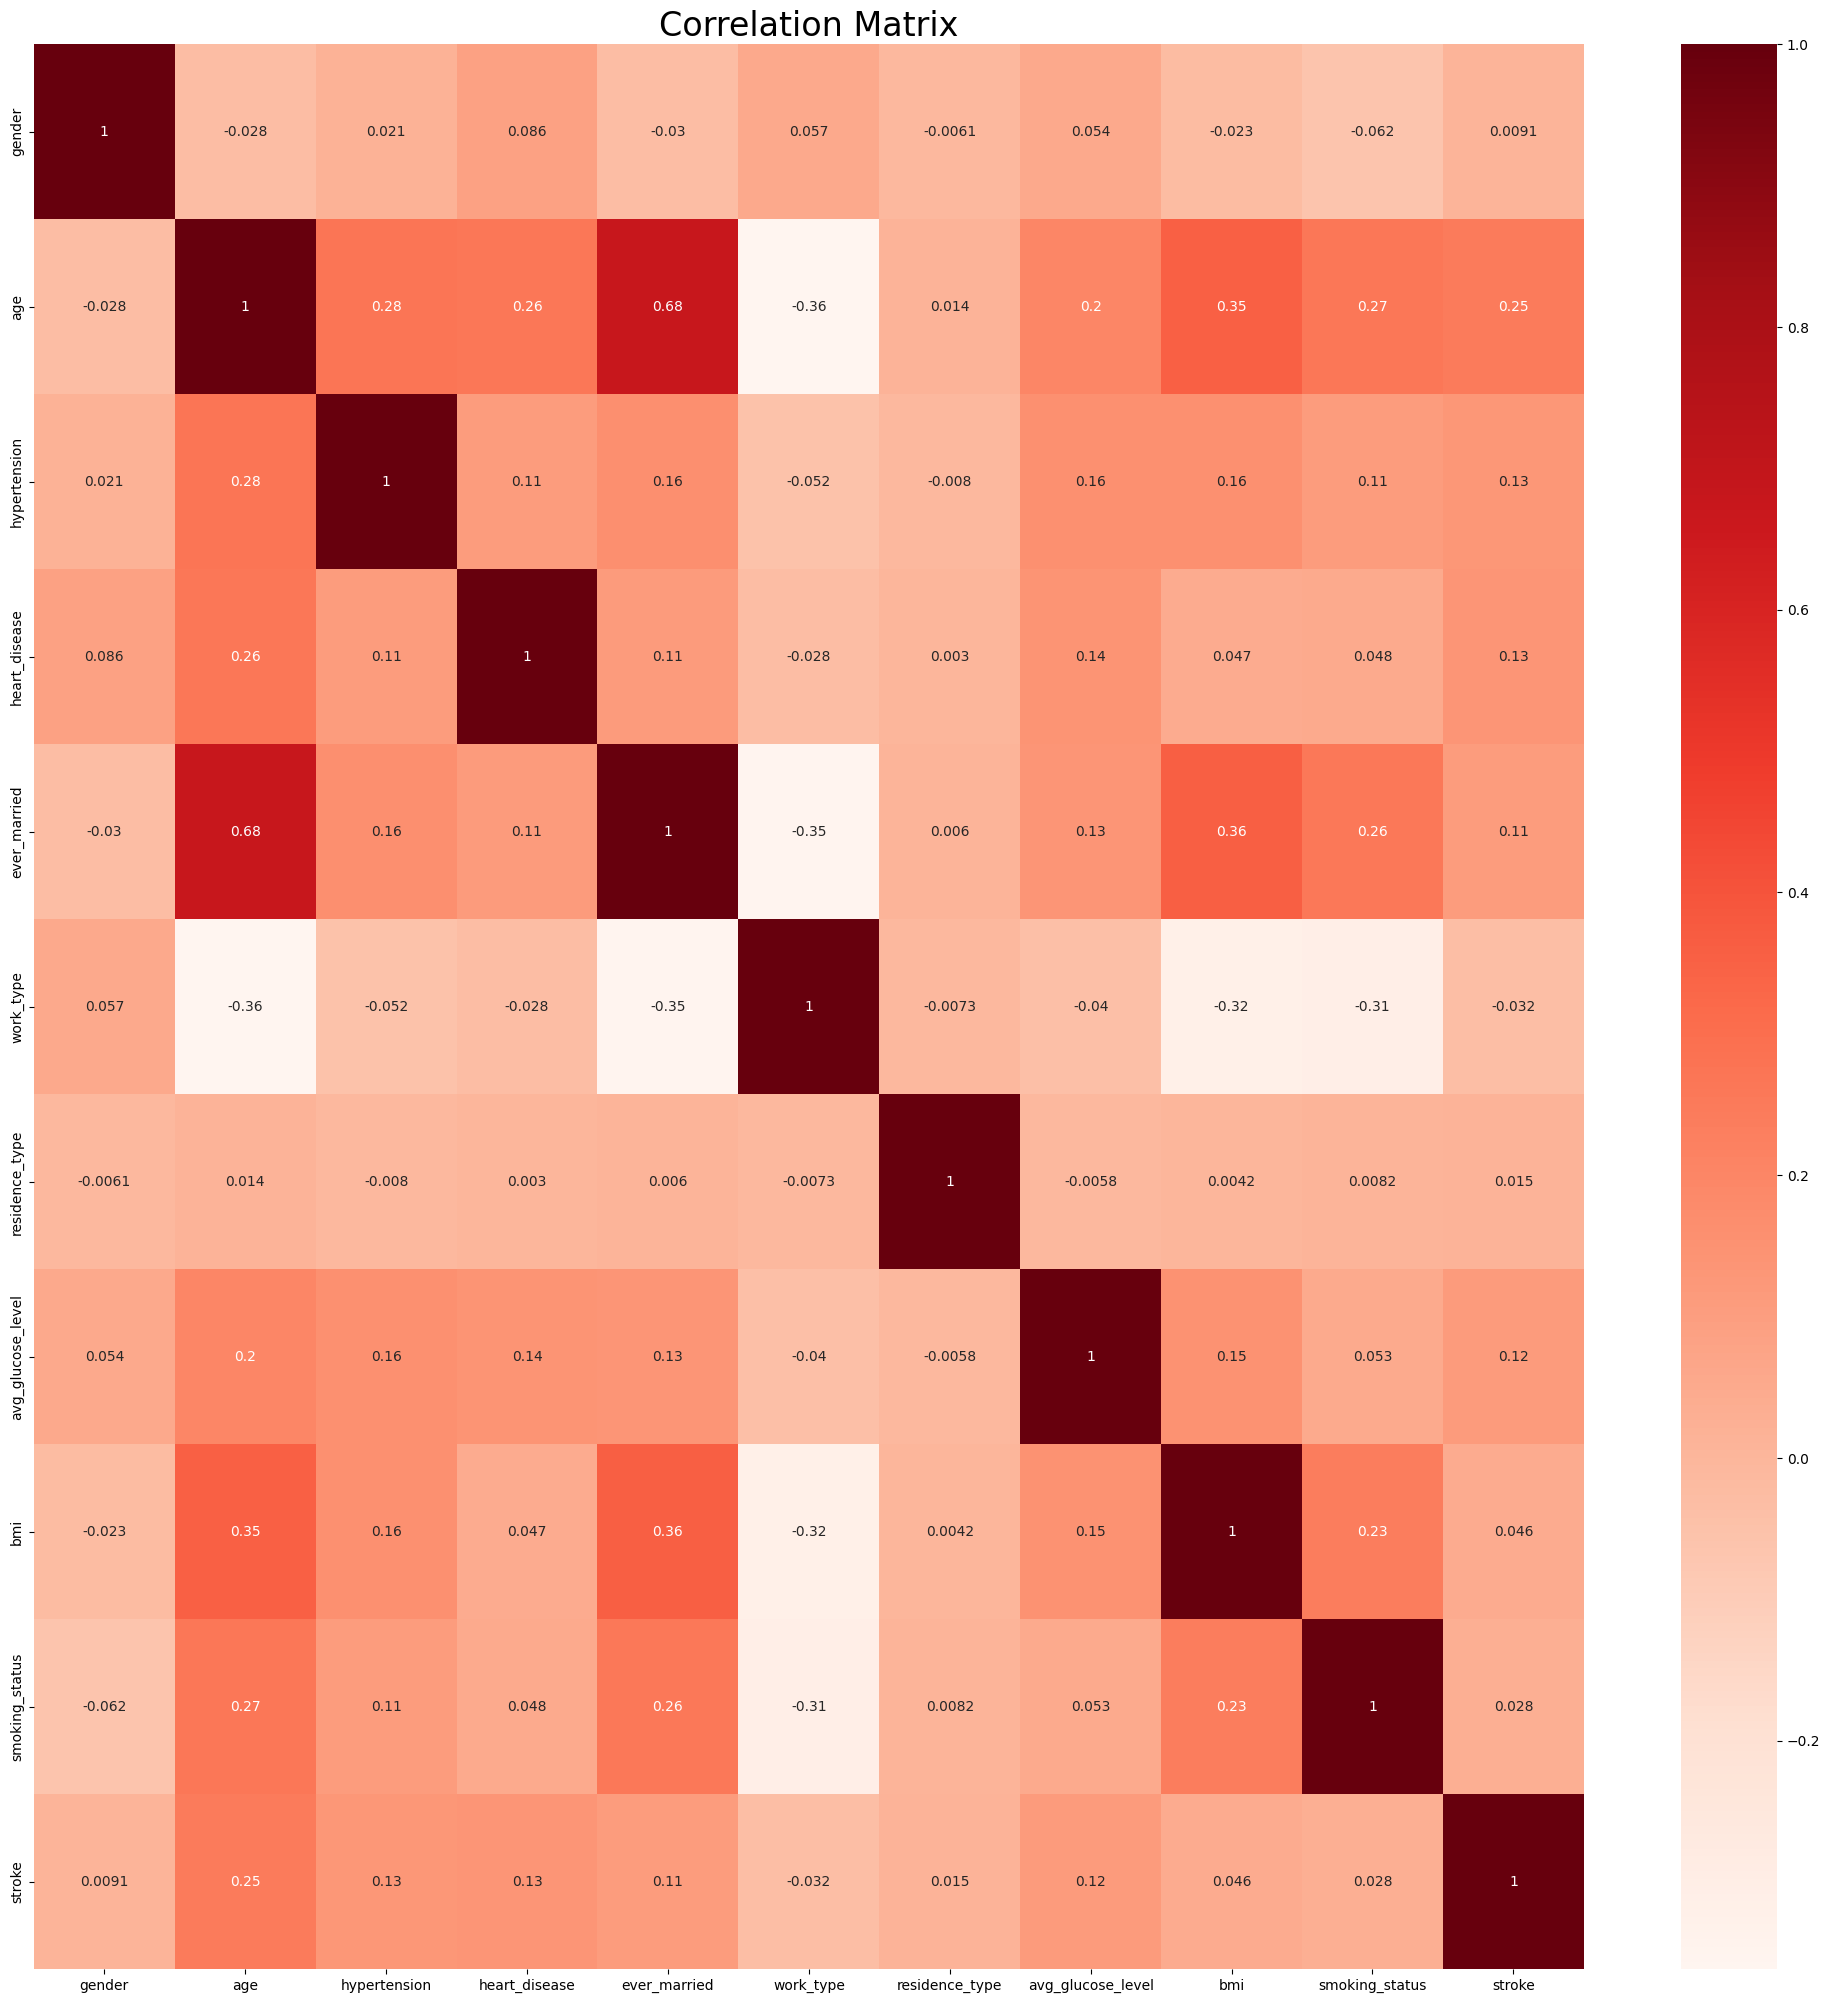

In [82]:
#Using Pearson Correlation
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Reds)
plt.title('Correlation Matrix', fontsize=24);
plt.savefig('correlationmatrix.png')
plt.show()

Above shown the heat map correlation matrix between each attributes.

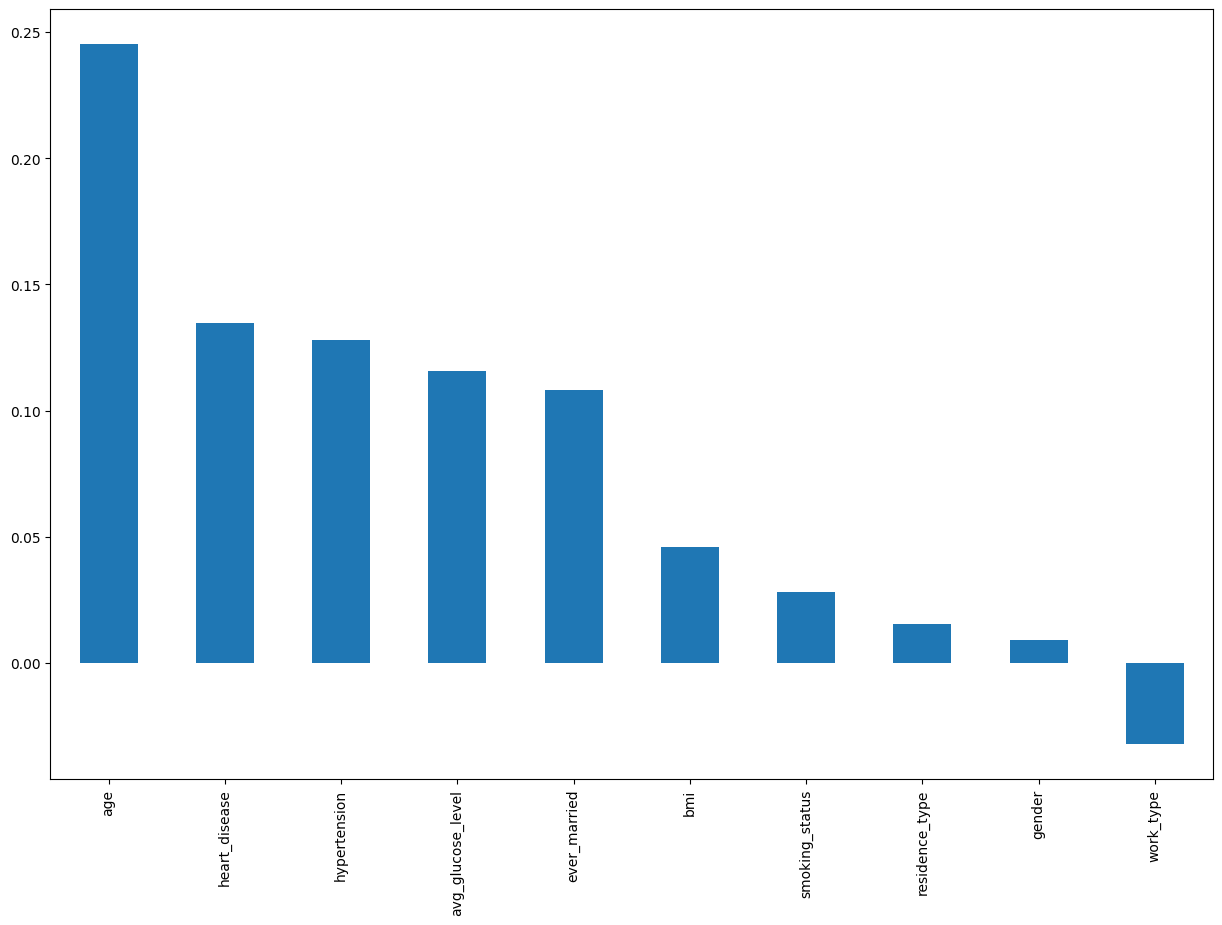

In [83]:
#Display the correlation in ascending order
plt.figure(figsize=(15,10))
df.corr()['stroke'].sort_values(ascending = False).drop('stroke').plot(kind='bar')
plt.savefig('correlationfeatures.png')

### Correlation Coefficient

Above shown the correlation matrix between each attribute with stroke.

In [84]:
#Selecting lowly correlated features with output variable (Dependent)
corr = df.corr().drop('stroke')
corr[abs(corr['stroke']) < 0.1]['stroke']

gender            0.009081
work_type        -0.032323
residence_type    0.015415
bmi               0.045807
smoking_status    0.028108
Name: stroke, dtype: float64

In [85]:
corr = df.corr().drop('stroke')
corr[abs(corr['stroke']) >= 0.1]['stroke']

age                  0.245239
hypertension         0.127891
heart_disease        0.134905
ever_married         0.108299
avg_glucose_level    0.115693
Name: stroke, dtype: float64

<ipython-input-86-61cb9910aece>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Correlation coefficient", y="Features",


Text(0.05, 1.02, 'Correlation features with target')

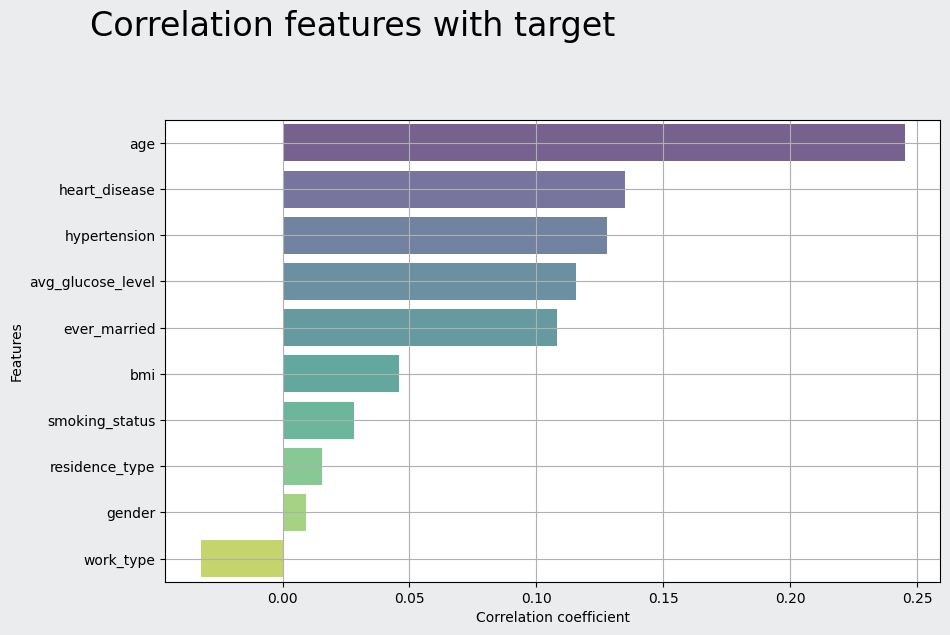

In [86]:
features=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type',
       'smoking_status', 'bmi', 'avg_glucose_level']
from matplotlib.offsetbox import AnchoredText
correlation_table = []
for cols in features:
    y = df["stroke"]
    x = df[cols]
    corr = np.corrcoef(x, y)[1][0]
    dict ={
        'Features': cols,
        'Correlation coefficient' : corr
    }
    correlation_table.append(dict)
dF1 = pd.DataFrame(correlation_table)
fig = plt.figure(figsize=(10,6), facecolor='#EAECEE')
ax = sns.barplot(x="Correlation coefficient", y="Features",
                     data=dF1.sort_values("Correlation coefficient", ascending=False),
                     palette='viridis', alpha=0.75)
ax.grid()
#ax.set_title("Correlation of numerical features with Target", fontsize=20, y=1.05)

plt.savefig('correlationfeatures2.png')
title =  'Correlation features with target'

plt.gcf().text(0.05, 1.02, title, fontsize=24)
#plt.gcf().text(0.05, 0.9, sub_title, fontsize=14)

The correlation of each feature with the target varaible, 'stroke', is summarise as above.

In [87]:
from scipy.stats import pearsonr
def get_correlation(column1, column2, df):
    pearson_corr, p_value = pearsonr(df[column1], df[column2])
    print("Correlation between {} and {} is {}".format(column1, column2, pearson_corr))
    print("P-value of this correlation is {}".format(p_value))

In [88]:
get_correlation('age','stroke', df)

Correlation between age and stroke is 0.2452387562319822
P-value of this correlation is 7.435468822640619e-71


In [89]:
get_correlation('hypertension','stroke', df)

Correlation between hypertension and stroke is 0.1278912591291928
P-value of this correlation is 4.4414725683766437e-20


In [90]:
get_correlation('heart_disease','stroke', df)

Correlation between heart_disease and stroke is 0.13490484180043016
P-value of this correlation is 3.5068021331454266e-22


In [91]:
get_correlation('ever_married','stroke', df)

Correlation between ever_married and stroke is 0.10829931566075437
P-value of this correlation is 8.367746992152753e-15


In [92]:
get_correlation('avg_glucose_level','stroke', df)

Correlation between avg_glucose_level and stroke is 0.11569349317785146
P-value of this correlation is 1.083122590131467e-16


In [93]:
get_correlation('bmi','stroke', df)

Correlation between bmi and stroke is 0.04580725509141853
P-value of this correlation is 0.0010562627997039034


In [94]:
get_correlation('residence_type','stroke', df)

Correlation between residence_type and stroke is 0.01541458421031534
P-value of this correlation is 0.27064072991915544


In [95]:
get_correlation('gender','stroke', df)

Correlation between gender and stroke is 0.00908060016007922
P-value of this correlation is 0.5163958663824261


In [96]:
get_correlation('smoking_status','stroke', df)

Correlation between smoking_status and stroke is 0.028107558141114698
P-value of this correlation is 0.044541717547095586


In [97]:
get_correlation('work_type','stroke', df)

Correlation between work_type and stroke is -0.0323231593851996
P-value of this correlation is 0.020865493997769942


### Chi-square Test

In [98]:
gender_stroke = pd.crosstab(df['gender'], df['stroke'])
gender_stroke

stroke,0,1
gender,,
0,2853,141
1,2007,108


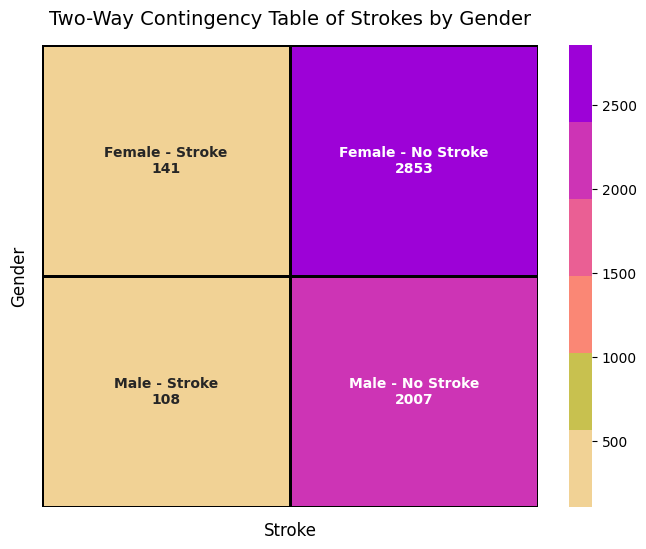

In [99]:
colors = ["#f1d295", "#c8c14f", "#fa8775", "#ea5f94", "#cd34b5", "#9d02d7"]
palette = sns.color_palette(palette = colors)

plt.subplots(figsize=(8,6))

stroke_matrix = np.array([[141, 2853], [108, 2007]])
labels = np.array([['Female - Stroke', 'Female - No Stroke'], ['Male - Stroke', 'Male - No Stroke']])
formatted = (np.asarray(["{0}\n{1:.0f}".format(text, data) for text, data in zip(labels.flatten(), stroke_matrix.flatten())])).reshape(2,2)


sns.heatmap(
    stroke_matrix,
    annot = formatted,
    fmt = '',
    cmap = palette,
    xticklabels = False,
    yticklabels = False,
    linecolor = 'black',
    linewidth = 1,
    annot_kws = {'fontweight': 'semibold'}
)
plt.title('Two-Way Contingency Table of Strokes by Gender', pad = 15, fontsize = 14)
plt.ylabel('Gender', fontsize = 12, labelpad = 10)
plt.xlabel('Stroke', fontsize = 12, labelpad = 10)
plt.savefig('stroke_gender.png')

In [100]:
heart_cont = pd.crosstab(df['heart_disease'], df['stroke'])
heart_cont

stroke,0,1
heart_disease,,
0,4631,202
1,229,47


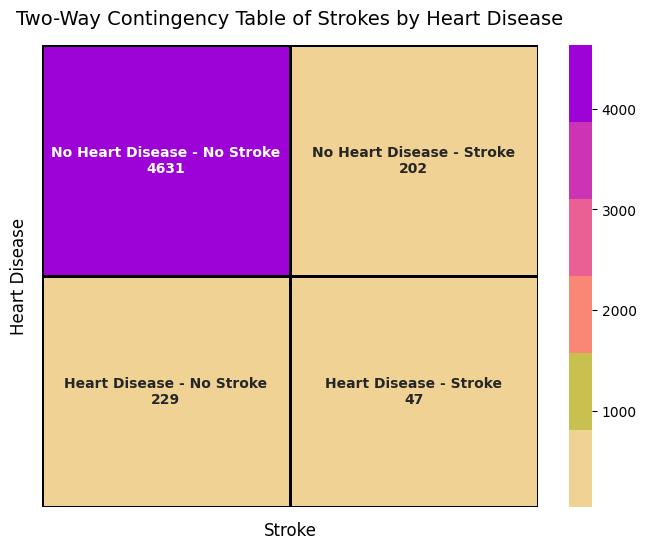

In [101]:
plt.subplots(figsize=(8,6))

heart_matrix = np.array([[4631, 202], [229, 47]])
labels = np.array([['No Heart Disease - No Stroke', 'No Heart Disease - Stroke'], ['Heart Disease - No Stroke', 'Heart Disease - Stroke']])
formatted = (np.asarray(["{0}\n{1:.0f}".format(text, data) for text, data in zip(labels.flatten(), heart_matrix.flatten())])).reshape(2,2)

sns.heatmap(
    heart_matrix,
    annot = formatted,
    fmt = '',
    cmap = palette,
    linewidth = 1,
    linecolor = 'black',
    xticklabels = False,
    yticklabels = False,
    annot_kws = {'fontweight': 'semibold'}
)
plt.title('Two-Way Contingency Table of Strokes by Heart Disease', pad = 15, fontsize = 14)
plt.ylabel('Heart Disease', labelpad = 10, fontsize = 12)
plt.xlabel('Stroke', labelpad = 10, fontsize = 12)
plt.savefig('stroke_heart.png')

In [102]:
hypertension_stroke = pd.crosstab(df['hypertension'], df['stroke'])
hypertension_stroke

stroke,0,1
hypertension,,
0,4428,183
1,432,66


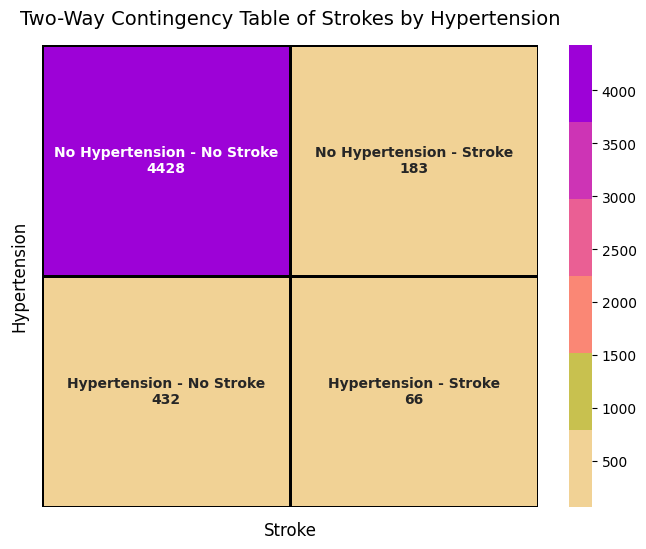

In [103]:
plt.subplots(figsize=(8,6))

hyper_matrix = np.array([[4428, 183], [432, 66]])
labels = np.array([['No Hypertension - No Stroke', 'No Hypertension - Stroke'], ['Hypertension - No Stroke', 'Hypertension - Stroke']])
formatted = (np.asarray(["{0}\n{1:.0f}".format(text, data) for text, data in zip(labels.flatten(), hyper_matrix.flatten())])).reshape(2,2)

sns.heatmap(
    hyper_matrix,
    annot = formatted,
    fmt = '',
    cmap = palette,
    linewidth = 1,
    linecolor = 'black',
    xticklabels = False,
    yticklabels = False,
    annot_kws = {'fontweight': 'semibold'}
)
plt.title('Two-Way Contingency Table of Strokes by Hypertension', pad = 15, fontsize = 14)
plt.ylabel('Hypertension', labelpad = 10, fontsize = 12)
plt.xlabel('Stroke', labelpad = 10, fontsize = 12)
plt.savefig('stroke_hypertension.png')

In [104]:
ever_married_stroke = pd.crosstab(df['ever_married'], df['stroke'])
ever_married_stroke

stroke,0,1
ever_married,,
0,1727,29
1,3133,220


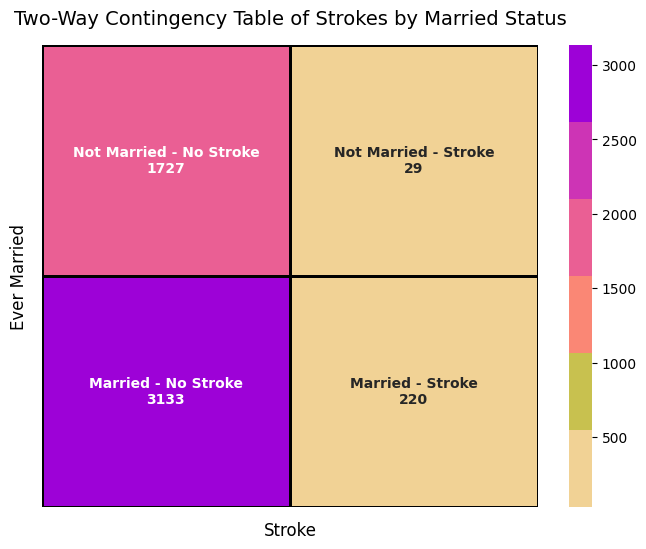

In [105]:
plt.subplots(figsize=(8,6))

married_matrix = np.array([[1727, 29], [3133, 220]])
labels = np.array([['Not Married - No Stroke', 'Not Married - Stroke'], ['Married - No Stroke', 'Married - Stroke']])
formatted = (np.asarray(["{0}\n{1:.0f}".format(text, data) for text, data in zip(labels.flatten(), married_matrix.flatten())])).reshape(2,2)

sns.heatmap(
    married_matrix,
    annot = formatted,
    fmt = '',
    cmap = palette,
    linewidth = 1,
    linecolor = 'black',
    xticklabels = False,
    yticklabels = False,
    annot_kws = {'fontweight': 'semibold'}
)
plt.title('Two-Way Contingency Table of Strokes by Married Status', pad = 15, fontsize = 14)
plt.ylabel('Ever Married', labelpad = 10, fontsize = 12)
plt.xlabel('Stroke', labelpad = 10, fontsize = 12)
plt.savefig('stroke_married.png')

In [106]:
df.groupby('work_type')['stroke'].value_counts()

work_type  stroke
0          0          624
           1           33
1          0           22
2          0         2775
           1          149
3          0          754
           1           65
4          0          685
           1            2
Name: count, dtype: int64

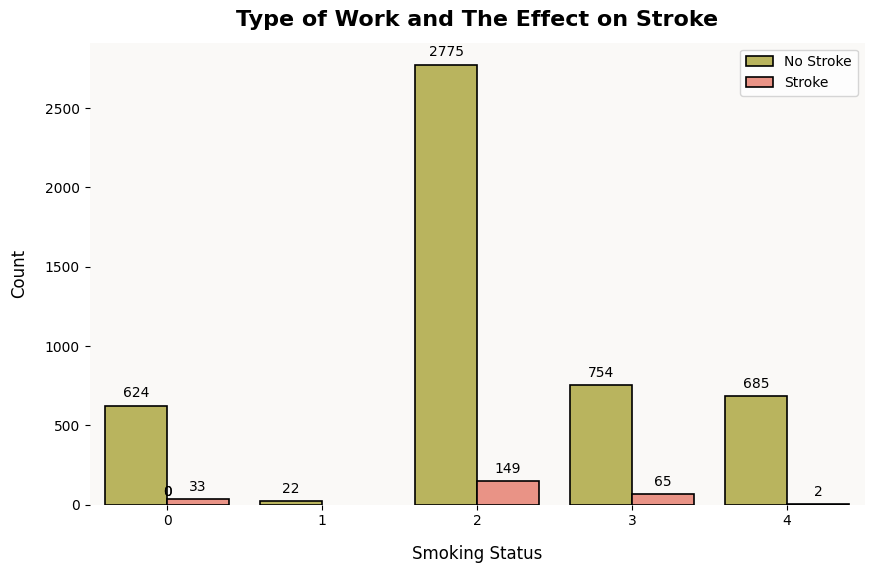

In [107]:
ig, ax = plt.subplots(figsize=(10,6))
fig.patch.set_facecolor('#faf9f7')
ax.set_facecolor('#faf9f7')

bar_pal = ["#c8c14f", "#fa8775"]

s = sns.countplot(
    data = df, x = 'work_type', hue = 'stroke', palette = bar_pal,
    linewidth = 1.2, ec = 'black'
)

for i in ['top', 'right', 'bottom', 'left']:
    ax.spines[i].set_visible(False)

plt.legend(['No Stroke', 'Stroke'])
plt.title("Type of Work and The Effect on Stroke", size = 16, weight = 'bold', pad = 12)
plt.xlabel('Smoking Status', size = 12, labelpad = 12)
plt.ylabel('Count', size = 12, labelpad = 12)

for i in s.patches:
    s.annotate(format(i.get_height(), '.0f'),  (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

fig.tight_layout()
plt.savefig('stroke_work.png')

In [108]:
residence_type_stroke = pd.crosstab(df['residence_type'], df['stroke'])
residence_type_stroke

stroke,0,1
residence_type,,
0,2399,114
1,2461,135


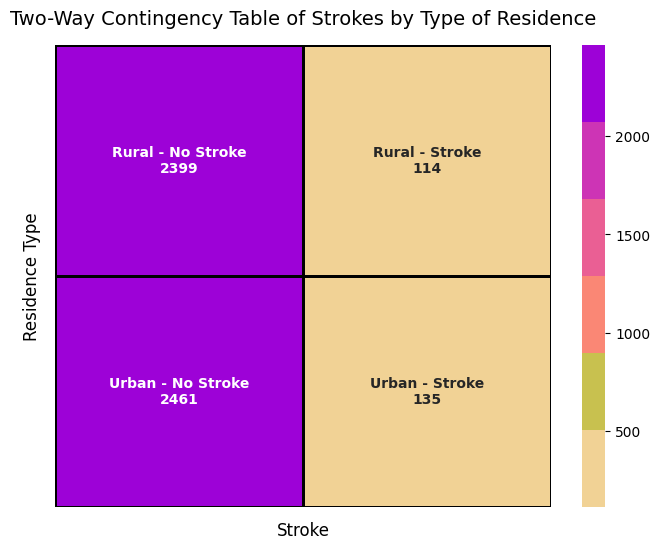

In [109]:
plt.subplots(figsize=(8,6))

resd_matrix = np.array([[2399, 114], [2461, 135]])
labels = np.array([['Rural - No Stroke', 'Rural - Stroke'], ['Urban - No Stroke', 'Urban - Stroke']])
formatted = (np.asarray(["{0}\n{1:.0f}".format(text, data) for text, data in zip(labels.flatten(), resd_matrix.flatten())])).reshape(2,2)

sns.heatmap(
    resd_matrix,
    annot = formatted,
    fmt = '',
    cmap = palette,
    linewidth = 1,
    linecolor = 'black',
    xticklabels = False,
    yticklabels = False,
    annot_kws = {'fontweight': 'semibold'}
)
plt.title('Two-Way Contingency Table of Strokes by Type of Residence', pad = 15, fontsize = 14)
plt.ylabel('Residence Type', labelpad = 10, fontsize = 12)
plt.xlabel('Stroke', labelpad = 10, fontsize = 12)
plt.savefig('stroke_residence.png')

In [110]:
df.groupby('smoking_status')['stroke'].value_counts()

smoking_status  stroke
0               0         1497
                1           47
1               0          814
                1           70
2               0         1802
                1           90
3               0          747
                1           42
Name: count, dtype: int64

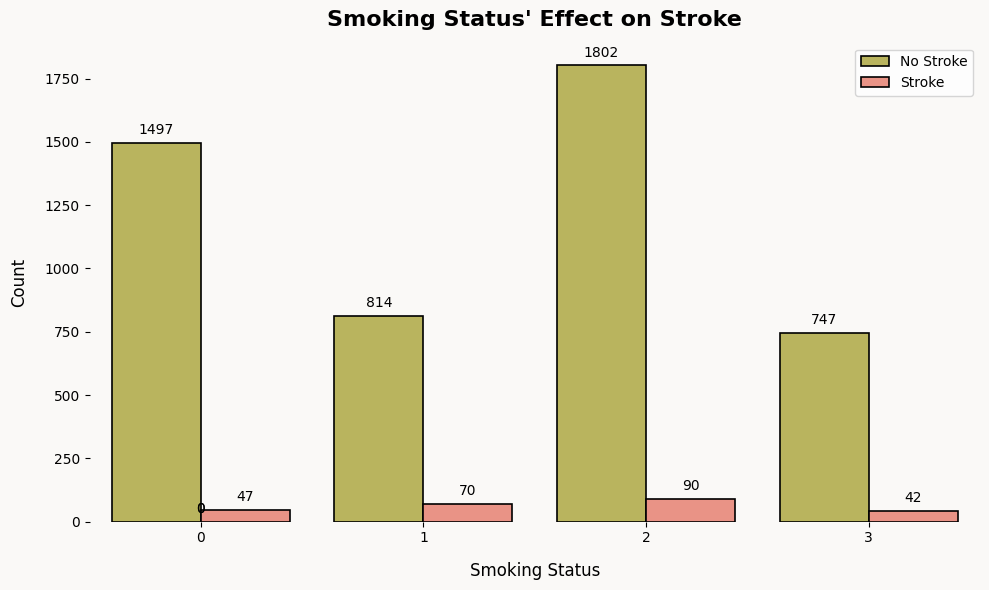

In [111]:
fig, ax = plt.subplots(figsize=(10,6))
fig.patch.set_facecolor('#faf9f7')
ax.set_facecolor('#faf9f7')

bar_pal = ["#c8c14f", "#fa8775"]

s = sns.countplot(
    data = df, x = 'smoking_status', hue = 'stroke', palette = bar_pal,
    linewidth = 1.2, ec = 'black'
)

for i in ['top', 'right', 'bottom', 'left']:
    ax.spines[i].set_visible(False)

plt.legend(['No Stroke', 'Stroke'])
plt.title("Smoking Status' Effect on Stroke", size = 16, weight = 'bold', pad = 12)
plt.xlabel('Smoking Status', size = 12, labelpad = 12)
plt.ylabel('Count', size = 12, labelpad = 12)

for i in s.patches:
    s.annotate(format(i.get_height(), '.0f'),  (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

fig.tight_layout()
plt.savefig('stroke_smoke.png')

In [112]:
from sklearn.feature_selection import SelectPercentile, chi2

In [113]:
# Setting significance level as 0.05
ALPHA = 0.05

In [114]:
df_chi = pd.DataFrame(df)
df_chi = df_chi.drop(columns=['age', 'bmi', 'avg_glucose_level'])

chi2_res = chi2(df_chi, df.stroke)
df_chi2 = pd.DataFrame({'target': 'stroke',
                        'cat_feature': df_chi.columns,
                        'chi2': chi2_res[0],
                        'p-value': chi2_res[1],
                        'rounded p': np.around(chi2_res[1], 3),
                        'alpha': ALPHA})
#df_chi2 = df_chi2.drop(df['cat_feature'=='stroke'], axis=0).reset_index(drop=True)
df_chi2['H0'] = df_chi2['p-value'].apply(lambda x: 'Rejected' if x <= ALPHA else 'Fail to reject')
df_chi2['relation'] = df_chi2['H0'].apply(lambda x: 'Dependent' if x=='Rejected' else 'Independent')
df_chi2.sort_values(by='chi2', ascending=False)


,target,cat_feature,chi2,p-value,rounded p,alpha,H0,relation
7,stroke,stroke,4860.000000,0.000000e+00,0.000,0.05,Rejected,Dependent
2,stroke,heart_disease,87.957296,6.688296e-21,0.000,0.05,Rejected,Dependent
1,stroke,hypertension,75.418319,3.808401e-18,0.000,0.05,Rejected,Dependent
3,stroke,ever_married,20.595671,5.672425e-06,0.000,0.05,Rejected,Dependent
6,stroke,smoking_status,3.365543,6.657364e-02,0.067,0.05,Fail to reject,Independent
4,stroke,work_type,2.927120,8.710275e-02,0.087,0.05,Fail to reject,Independent
5,stroke,residence_type,0.597112,4.396819e-01,0.440,0.05,Fail to reject,Independent
0,stroke,gender,0.246877,6.192826e-01,0.619,0.05,Fail to reject,Independent


In [117]:
dfi.export(df_chi2, 'chisquare.png')

AttributeError: 'DataFrame' object has no attribute 'export'

## Class Imbalance

As can be seen from the pie chart and barchart above, class imbalance exists in the target variable 'stroke' where 95% of the dataset falls under 'no stroke' and the rest under 'stroke'. Random Undersampling method is used to deal with class imbalance. Random Undersampling is chosen since the percentage difference between two classes is large, hence records from the majority class will be deleted. Oversampling is not chosen to avoid overfitting from duplicating too many records in the minority class.

The number of records for 'No stroke' are decreased to a ratio of 1:1 with 'Stroke' , and hence the overall size of the dataset will be decreased.


In [118]:
pip install imblearn

### Random Under Sample (RUS)

In [119]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

X=df_rus.drop(columns='stroke') ##df_rus was added in In[22] above
y=df_rus['stroke']

rus = RandomUnderSampler(sampling_strategy=1.0, random_state=200)
x_rus, y_rus = rus.fit_resample(X, y)

print('Original dataset shape:\n', y.value_counts())
print('Undersampled dataset shape:\n', y_rus.value_counts())

ndf = pd.DataFrame(x_rus)
ndf['stroke'] = y_rus
ndf.shape

Original dataset shape:
 stroke
0    4860
1     249
Name: count, dtype: int64
Undersampled dataset shape:
 stroke
0    249
1    249
Name: count, dtype: int64


(498, 11)

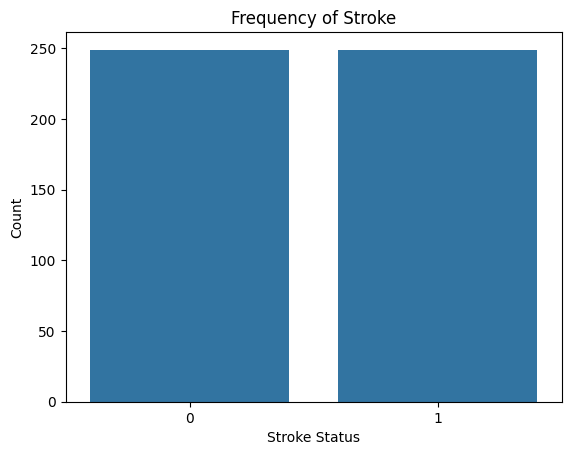

In [120]:
sns.countplot(data=ndf, x='stroke')
plt.xticks(np.arange(2))
plt.xlabel('Stroke Status')
plt.ylabel('Count')
plt.title('Frequency of Stroke')
plt.savefig('strokedistribution2.png')
plt.show()

In [121]:
ndf.groupby(['gender', 'stroke'])['stroke'].count()

gender  stroke
0       0         148
        1         141
1       0         101
        1         108
Name: stroke, dtype: int64

## Synthetic Minority Oversampling Technique (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE

X_smote=df_smote.drop(columns='stroke') ##df_smote was added in In[23] above
y_smote=df_smote['stroke']

smote = SMOTE()
x_oversample, y_oversample = smote.fit_resample(X_smote, y_smote)

print('Original dataset shape:\n', y_smote.value_counts())
print('Oversampled dataset shape:\n', y_oversample.value_counts())

sdf = pd.DataFrame(x_oversample)
sdf['stroke'] = y_oversample
sdf.shape

In [ ]:
sns.countplot(data=sdf, x='stroke')
plt.xticks(np.arange(2))
plt.xlabel('Stroke Status')
plt.ylabel('Count')
plt.title('Frequency of Stroke')
plt.savefig('strokedistribution3.png')
plt.show()

In [ ]:
sdf.groupby(['gender', 'stroke'])['stroke'].count()

## Model Development

### Model Development with RUS without feature selection

In [124]:
#Dropping the target variable
X = ndf.drop('stroke', axis = 1)

In [125]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status
0,0,63.0,0,0,1,3,0,75.93,34.7,1
1,0,39.0,0,0,1,2,1,87.39,46.2,2
2,0,42.0,0,0,1,0,1,83.70,20.6,2
3,0,47.0,0,0,1,0,0,100.41,23.8,2
4,0,24.0,0,0,0,2,0,97.95,34.7,0


In [126]:
Y = ndf['stroke']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: stroke, dtype: int64

In [127]:
#Create the training and testing data
from sklearn.model_selection import train_test_split, cross_val_score

#Split the data by allocating 80% for training dataset and the remaining 20% for testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [128]:
#Display all the sizes of the training and testing dataset
print ('The size of our training "X" (input features) is', X_train.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', X_test.shape)
print ('\n')
print ('The size of our training "Y" (output feature) is', Y_train.shape)
print ('\n')
print ('The size of our testing "Y" (output features) is', Y_test.shape)

The size of our training "X" (input features) is (398, 10)


The size of our testing "X" (input features) is (100, 10)


The size of our training "Y" (output feature) is (398,)


The size of our testing "Y" (output features) is (100,)


In [130]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
import dataframe_image as dfi

ModuleNotFoundError: No module named 'dataframe_image'

### Logistic Regression

In [131]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver='lbfgs', max_iter=10000)
log.fit(X_train, Y_train)

#Test set prediction
y_pred_log = log.predict(X_test)
y_pred_prob_log = log.predict_proba(X_test)[:, 1]
cr = classification_report(Y_test, y_pred_log)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.71      0.74        49
           1       0.75      0.80      0.77        51

    accuracy                           0.76       100
   macro avg       0.76      0.76      0.76       100
weighted avg       0.76      0.76      0.76       100



In [132]:
print('Precision Score: ', round(precision_score(Y_test, y_pred_log), 2))
print('Recall Score: ', round(recall_score(Y_test, y_pred_log), 2))
print('F1 Score: ', round(f1_score(Y_test, y_pred_log), 2))
lr_accuracy = accuracy_score(Y_test, y_pred_log)
print(f"Accuracy Score: {lr_accuracy * 100:.2f}%")
print('ROC AUC: ', round(roc_auc_score(Y_test, y_pred_prob_log), 2))

Precision Score:  0.75
Recall Score:  0.8
F1 Score:  0.77
Accuracy Score: 76.00%
ROC AUC:  0.84


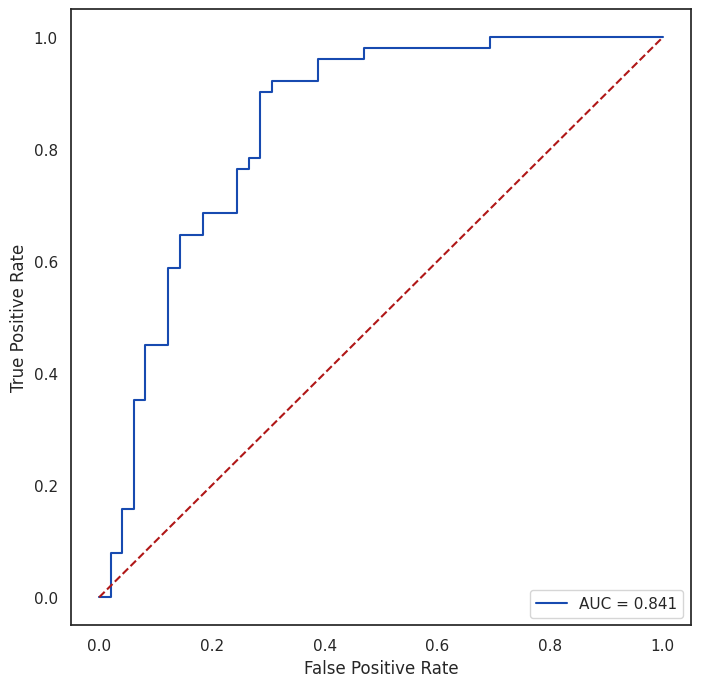

In [133]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred_prob_log)
roc_auc_log = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#174ab0', label = 'AUC = %0.3f' % roc_auc_log)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#b01717')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROC_RUS_log.jpg')
plt.show()

AUC For Logisitic Regression with RUS without feature selection

AUC of Logistic Regression with RUS without feature selection was found to be 0.84, which is considered a good score (0.8 - 0.9 AUC) based on the rule of thumb from Hosmer and Lemeshow in Applied Logistic Regression. With the blue line representing the ROC for Logistic Regression with RUS without feature selection and the red line representing the ROC of random chance.

Text(0.5, 1.0, 'Confusion Matrix')

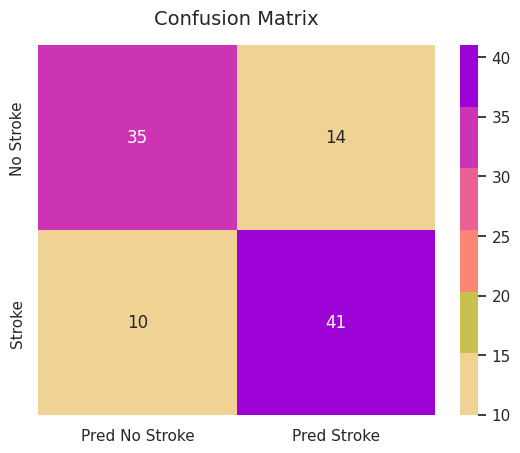

In [134]:
sns.heatmap(
    confusion_matrix(Y_test, y_pred_log),
    cmap = palette,
    annot = True,
    fmt = 'd',
    yticklabels = ['No Stroke', 'Stroke'],
    xticklabels = ['Pred No Stroke', 'Pred Stroke']
)
plt.title('Confusion Matrix', pad = 15, fontsize = 14)

In [135]:
lr_scores = cross_val_score(log, X=X_train, y=Y_train, cv=5)
lr_avg_score = lr_scores.mean()
lr_avg_score

0.7540506329113924

Based on the value of the mean of cross validation score with 5 folds, it is determined that the K-fold validation value of Logistic Regression with RUS without feature selection is 0.7540, showing a decent performance of the machine learning algorithm on a dataset.

### Random Forest Classifier

In [136]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

#Test set prediction
y_pred_rf = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]
cr_rf = classification_report(Y_test, y_pred_rf)
print(cr_rf)

              precision    recall  f1-score   support

           0       0.80      0.73      0.77        49
           1       0.76      0.82      0.79        51

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100



In [137]:
print('Precision Score: ', round(precision_score(Y_test, y_pred_rf), 2))
print('Recall Score: ', round(recall_score(Y_test, y_pred_rf), 2))
print('F1 Score: ', round(f1_score(Y_test, y_pred_rf), 2))
rf_accuracy = accuracy_score(Y_test, y_pred_rf)
print(f"Accuracy Score: {rf_accuracy * 100:.2f}%")
print('ROC AUC: ', round(roc_auc_score(Y_test, y_pred_prob_rf), 2))

Precision Score:  0.76
Recall Score:  0.82
F1 Score:  0.79
Accuracy Score: 78.00%
ROC AUC:  0.84


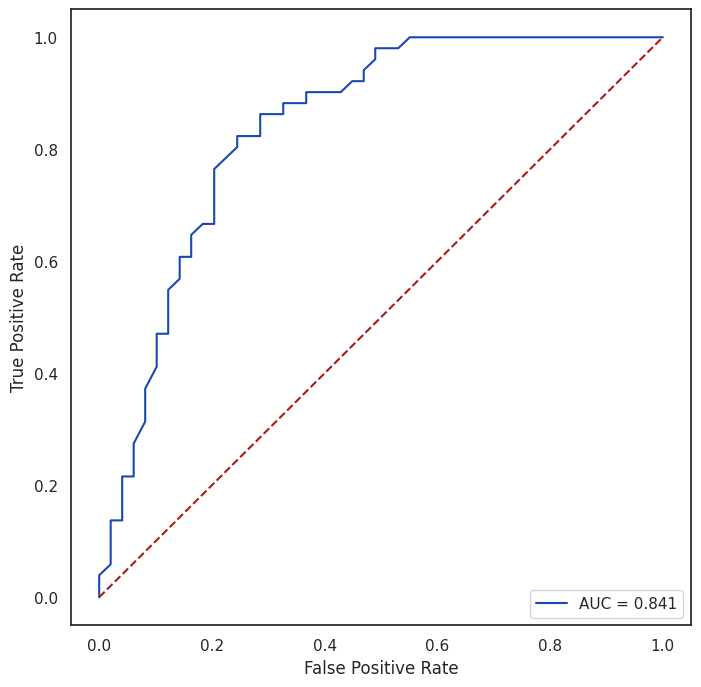

In [138]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred_prob_rf)
roc_auc_rf = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#174ab0', label = 'AUC = %0.3f' % roc_auc_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#b01717')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROC_RUS_rf.jpg')
plt.show()

Figure above shows a more detailed version of the ROC for Random Forest Classifier with RUS without feature selection, with the blue line representing the ROC for Random Forest Classifier with RUS without feature selection and the Redline representing the ROC of random chance.

AUC of Random Forest Classifier with RUS without feature selection was found to be 0.844, which is considered a good score (0.8 - 0.9 AUC) based on the rule of thumb of deciles from Hosmer and Lemeshow.

Text(0.5, 1.0, 'Confusion Matrix')

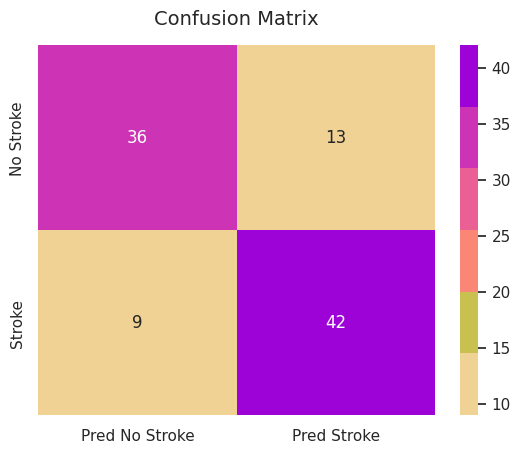

In [139]:
sns.heatmap(
    confusion_matrix(Y_test, y_pred_rf),
    cmap = palette,
    annot = True,
    fmt = 'd',
    yticklabels = ['No Stroke', 'Stroke'],
    xticklabels = ['Pred No Stroke', 'Pred Stroke']
)
plt.title('Confusion Matrix', pad = 15, fontsize = 14)

In [140]:
rf_scores = cross_val_score(rf, X=X_train, y=Y_train, cv=5)
rf_avg_score = rf_scores.mean()
rf_avg_score

0.7463607594936709

Based on the value of the mean of cross validation score with 5 folds, it is determined that the K-fold validation value of Logistic Regression with RUS without feature selection is 0.7439, showing a decent performance of the machine learning algorithm on a dataset.

### K-Nearest Neighbors

In [141]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]
cr_knn = classification_report(Y_test, y_pred_knn)
print(cr_knn)

              precision    recall  f1-score   support

           0       0.82      0.63      0.71        49
           1       0.71      0.86      0.78        51

    accuracy                           0.75       100
   macro avg       0.76      0.75      0.75       100
weighted avg       0.76      0.75      0.75       100



In [142]:
print('Precision Score: ', round(precision_score(Y_test, y_pred_knn), 2))
print('Recall Score: ', round(recall_score(Y_test, y_pred_knn), 2))
print('F1 Score: ', round(f1_score(Y_test, y_pred_knn), 2))
knn_accuracy = accuracy_score(Y_test, y_pred_knn)
print(f"Accuracy Score: {knn_accuracy * 100:.2f}%")
print('ROC AUC: ', round(roc_auc_score(Y_test, y_pred_prob_knn), 2))

Precision Score:  0.71
Recall Score:  0.86
F1 Score:  0.78
Accuracy Score: 75.00%
ROC AUC:  0.76


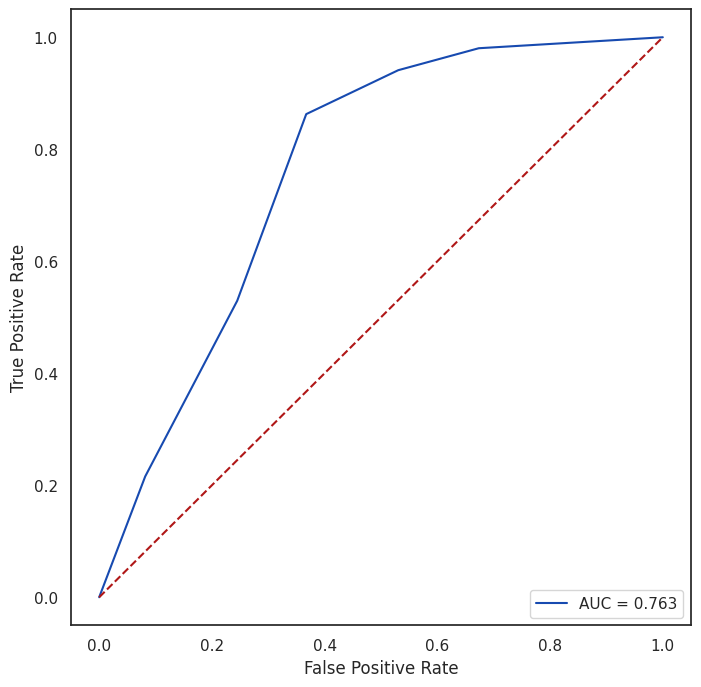

In [143]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred_prob_knn)
roc_auc_knn = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#174ab0', label = 'AUC = %0.3f' % roc_auc_knn)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#b01717')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROC_RUS_KNN.jpg')
plt.show()

Figure above shows a more detailed version of the ROC for K-Nearest Neighbours with RUS without feature selection, with the blue line representing the ROC for K - Nearest Neighbours with RUS without feature selection and the Redline representing the ROC of random chance.

AUC of K - Nearest Neighbours with RUS without feature selection was found to be 0.763, which is in the neighbourhood of a fair distribution (0.7 - 0.8 AUC) based on the rule of thumb of deciles from Hosmer and Lemeshow.

Text(0.5, 1.0, 'Confusion Matrix')

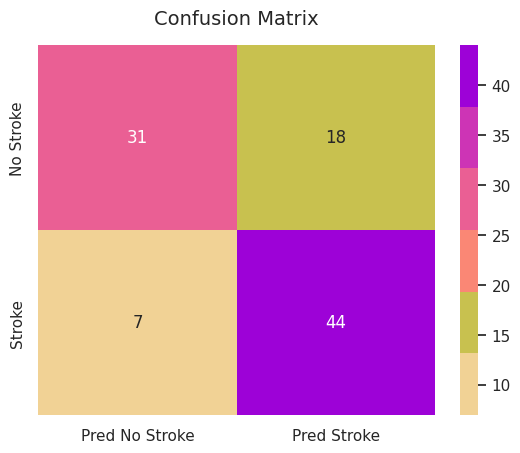

In [144]:
sns.heatmap(
    confusion_matrix(Y_test, y_pred_knn),
    cmap = palette,
    annot = True,
    fmt = 'd',
    yticklabels = ['No Stroke', 'Stroke'],
    xticklabels = ['Pred No Stroke', 'Pred Stroke']
)
plt.title('Confusion Matrix', pad = 15, fontsize = 14)

In [145]:
knn_scores = cross_val_score(knn, X=X_train, y=Y_train, cv=5)
knn_avg_score = knn_scores.mean()
knn_avg_score

0.7212658227848101

Based on the value of the mean of cross validation score with 5 folds, it is determined that the K-fold validation value of K - Nearest Neighbours with RUS without feature selection is 0.7213, showing a decent performance of the machine learning algorithm on a dataset.

### Decision Tree Classifier

In [146]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

#Test set prediction
y_pred_dtc = dtc.predict(X_test)
y_pred_prob_dtc = dtc.predict_proba(X_test)[:, 1]
cr_dtc = classification_report(Y_test, y_pred_dtc)
print(cr_dtc)

              precision    recall  f1-score   support

           0       0.64      0.59      0.62        49
           1       0.64      0.69      0.66        51

    accuracy                           0.64       100
   macro avg       0.64      0.64      0.64       100
weighted avg       0.64      0.64      0.64       100



In [147]:
print('Precision Score: ', round(precision_score(Y_test, y_pred_dtc), 2))
print('Recall Score: ', round(recall_score(Y_test, y_pred_dtc), 2))
print('F1 Score: ', round(f1_score(Y_test, y_pred_dtc), 2))
dtc_accuracy = accuracy_score(Y_test, y_pred_dtc)
print(f"Accuracy Score: {dtc_accuracy * 100:.2f}%")
print('ROC AUC: ', round(roc_auc_score(Y_test, y_pred_prob_dtc), 2))

Precision Score:  0.64
Recall Score:  0.69
F1 Score:  0.66
Accuracy Score: 64.00%
ROC AUC:  0.64


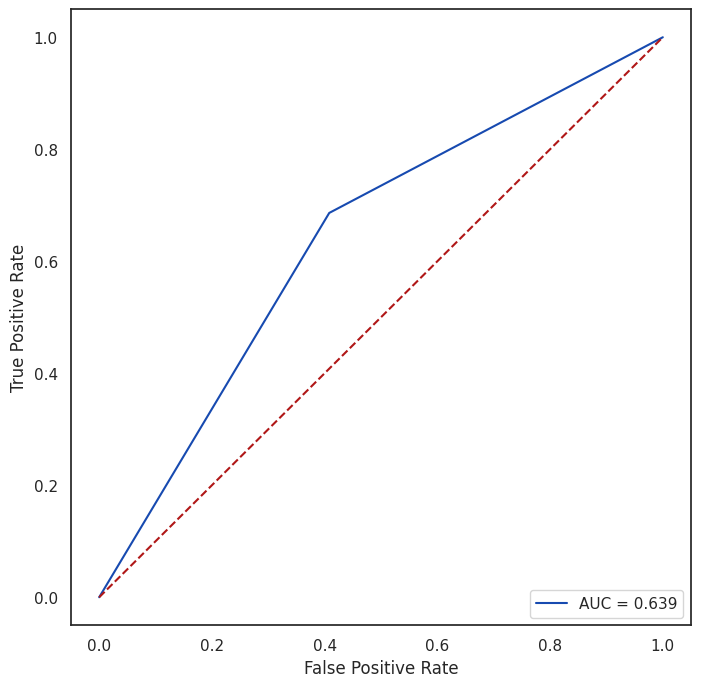

In [148]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred_prob_dtc)
roc_auc_dtc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#174ab0', label = 'AUC = %0.3f' % roc_auc_dtc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#b01717')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROC_RUS_DTC.jpg')
plt.show()

Figure above shows a more detailed version of the ROC for Decision Tree Classifier with RUS without feature selection, with the blue line representing the ROC for Decision Tree Classifier with RUS without feature selection and the Redline representing the ROC of random chance.

AUC of Decision Tree Classifier with RUS without feature selection was found to be 0.601, which can be considered a poor distribution (0.6 - 0.7 AUC) based on the rule of thumb of deciles from Hosmer and Lemeshow.

Text(0.5, 1.0, 'Confusion Matrix')

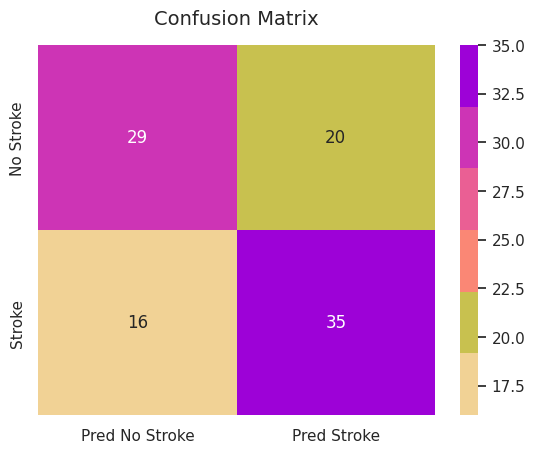

In [149]:
sns.heatmap(
    confusion_matrix(Y_test, y_pred_dtc),
    cmap = palette,
    annot = True,
    fmt = 'd',
    yticklabels = ['No Stroke', 'Stroke'],
    xticklabels = ['Pred No Stroke', 'Pred Stroke']
)
plt.title('Confusion Matrix', pad = 15, fontsize = 14)

In [150]:
dtc_scores = cross_val_score(dtc, X=X_train, y=Y_train, cv=5)
dtc_avg_score = dtc_scores.mean()
dtc_avg_score

0.6556329113924051

Based on the value of the mean of cross validation score with 5 folds, it is determined that the K-fold validation value of Decision Tree Classifier with RUS without feature selection is 0.6557, showing a bad performance of the machine learning algorithm on a dataset.

### Naive Bayes

In [151]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, Y_train)

#Test set prediction
y_pred_nb = nb.predict(X_test)
y_pred_prob_nb = nb.predict_proba(X_test)[:, 1]
cr_nb = classification_report(Y_test, y_pred_nb)
print(cr_nb)

              precision    recall  f1-score   support

           0       0.72      0.86      0.79        49
           1       0.83      0.69      0.75        51

    accuracy                           0.77       100
   macro avg       0.78      0.77      0.77       100
weighted avg       0.78      0.77      0.77       100



In [152]:
print('Precision Score: ', round(precision_score(Y_test, y_pred_nb), 2))
print('Recall Score: ', round(recall_score(Y_test, y_pred_nb), 2))
print('F1 Score: ', round(f1_score(Y_test, y_pred_nb), 2))
nb_accuracy = accuracy_score(Y_test, y_pred_nb)
print(f"Accuracy Score: {nb_accuracy * 100:.2f}%")
print('ROC AUC: ', round(roc_auc_score(Y_test, y_pred_prob_nb), 2))

Precision Score:  0.83
Recall Score:  0.69
F1 Score:  0.75
Accuracy Score: 77.00%
ROC AUC:  0.85


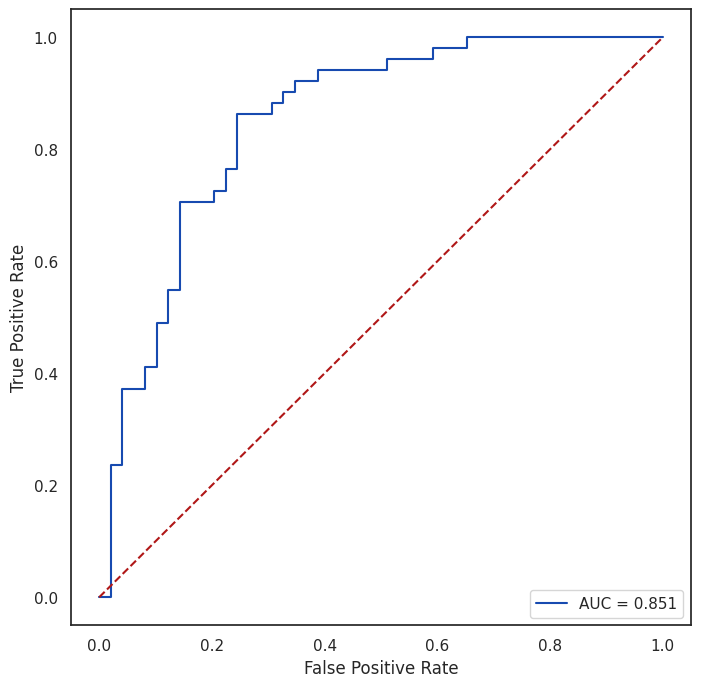

In [153]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred_prob_nb)
roc_auc_nb = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#174ab0', label = 'AUC = %0.3f' % roc_auc_nb)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#b01717')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROC_RUS_NB.jpg')
plt.show()

Figure above shows a more detailed version of the ROC for Naive Bayes with RUS without feature selection, with the blue line representing the ROC for Naive Bayes with RUS without feature selection and the Redline representing the ROC of random chance.

AUC of Naive Bayes with RUS without feature selection was found to be 0.851, which can be considered a good distribution (0.8 - 0.9 AUC) based on the rule of thumb of deciles from Hosmer and Lemeshow.

Text(0.5, 1.0, 'Confusion Matrix')

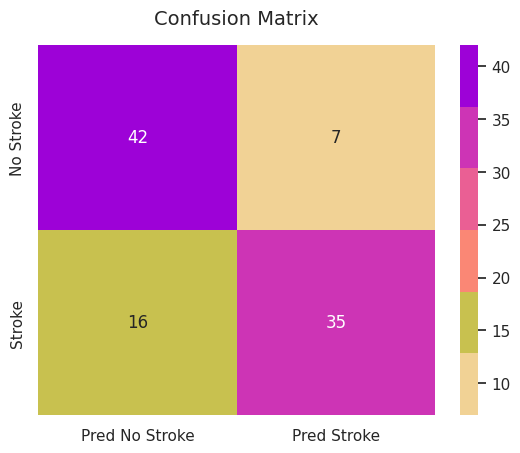

In [154]:
sns.heatmap(
    confusion_matrix(Y_test, y_pred_nb),
    cmap = palette,
    annot = True,
    fmt = 'd',
    yticklabels = ['No Stroke', 'Stroke'],
    xticklabels = ['Pred No Stroke', 'Pred Stroke']
)
plt.title('Confusion Matrix', pad = 15, fontsize = 14)

In [155]:
nb_scores = cross_val_score(nb, X=X_train, y=Y_train, cv=5)
nb_avg_score = nb_scores.mean()
nb_avg_score

0.7035443037974682

Based on the value of the mean of cross validation score with 5 folds, it is determined that the K-fold validation value of Naive Bayes Classifier with RUS without feature selection is 0.703, showing a decent performance of the machine learning algorithm on a dataset.

In [156]:
model_names = ['Logistic Regresstion', 'Naive Bayes', 'K-Nearest Neighbours', 'Decision Tree Classifier', 'Random Forest Classifier']
accuracies = [lr_accuracy, nb_accuracy, knn_accuracy, dtc_accuracy, rf_accuracy]
kfold_validation = [lr_avg_score, nb_avg_score, knn_avg_score, dtc_avg_score, rf_avg_score]
roc_scores = [roc_auc_score(Y_test, y_pred_prob_log), roc_auc_score(Y_test, y_pred_prob_nb), roc_auc_score(Y_test, y_pred_prob_knn), roc_auc_score(Y_test, y_pred_prob_dtc), roc_auc_score(Y_test, y_pred_prob_rf)]
precision_scores = [precision_score(Y_test, y_pred_log), precision_score(Y_test, y_pred_nb), precision_score(Y_test, y_pred_knn), precision_score(Y_test, y_pred_dtc), precision_score(Y_test, y_pred_rf)]
recall_scores = [recall_score(Y_test, y_pred_log), recall_score(Y_test, y_pred_nb), recall_score(Y_test, y_pred_knn), recall_score(Y_test, y_pred_dtc), recall_score(Y_test, y_pred_rf)]
f1_scores = [f1_score(Y_test, y_pred_log), f1_score(Y_test, y_pred_nb), f1_score(Y_test, y_pred_knn), f1_score(Y_test, y_pred_dtc), f1_score(Y_test, y_pred_rf)]
accuracy_table = pd.DataFrame({'Model':model_names, 'Accuracy':accuracies,'K-Fold Validation':kfold_validation, 'ROC Score':roc_scores, 'Precision':precision_scores,'Recall':recall_scores, 'F1 Score':f1_scores})
accuracy_table = accuracy_table.sort_values(by=['Accuracy','K-Fold Validation','ROC Score','Precision','Recall','F1 Score'], axis=0, ascending = False)
accuracy_table.reset_index(inplace = True, drop=True)
accuracy_table.index += 1
accuracy_table

,Model,Accuracy,K-Fold Validation,ROC Score,Precision,Recall,F1 Score
1,Random Forest Classifier,0.78,0.746361,0.840736,0.763636,0.823529,0.792453
2,Naive Bayes,0.77,0.703544,0.850740,0.833333,0.686275,0.752688
3,Logistic Regresstion,0.76,0.754051,0.840736,0.745455,0.803922,0.773585
4,K-Nearest Neighbours,0.75,0.721266,0.762705,0.709677,0.862745,0.778761
5,Decision Tree Classifier,0.64,0.655633,0.639056,0.636364,0.686275,0.660377


In [158]:
dfi.export(accuracy_table, 'rus.png')

NameError: name 'dfi' is not defined

### Model Development with RUS with feature selection

In [159]:
x_feat = ndf[['age','hypertension','heart_disease','work_type','avg_glucose_level','bmi','smoking_status']]
y_feat = ndf['stroke']

In [160]:
x_feat.head()

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status
0,63.0,0,0,3,75.93,34.7,1
1,39.0,0,0,2,87.39,46.2,2
2,42.0,0,0,0,83.70,20.6,2
3,47.0,0,0,0,100.41,23.8,2
4,24.0,0,0,2,97.95,34.7,0


In [161]:
y_feat.head()

0    0
1    0
2    0
3    0
4    0
Name: stroke, dtype: int64

In [162]:
#Split the data by allocating 80% for training dataset and the remaining 20% for testing dataset
X_feat_train, X_feat_test, Y_feat_train, Y_feat_test = train_test_split(x_feat, y_feat, test_size = 0.2, random_state = 0)

In [163]:
#Display all the sizes of the training and testing dataset
print ('The size of our training "X" (input features) is', X_feat_train.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', X_feat_test.shape)
print ('\n')
print ('The size of our training "Y" (output feature) is', Y_feat_train.shape)
print ('\n')
print ('The size of our testing "Y" (output features) is', Y_feat_test.shape)

The size of our training "X" (input features) is (398, 7)


The size of our testing "X" (input features) is (100, 7)


The size of our training "Y" (output feature) is (398,)


The size of our testing "Y" (output features) is (100,)


### Logistic Regression

In [164]:
log_feat = LogisticRegression(solver='lbfgs', max_iter=10000)
log_feat.fit(X_feat_train, Y_feat_train)

#Test set prediction
y_feat_pred_log = log_feat.predict(X_feat_test)
y_pred_prob_log_feat = log_feat.predict_proba(X_feat_test)[:, 1]
cr_lr_feat = classification_report(Y_feat_test, y_feat_pred_log)
print(cr_lr_feat)

              precision    recall  f1-score   support

           0       0.80      0.73      0.77        49
           1       0.76      0.82      0.79        51

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100



In [165]:
print('Precision Score: ', round(precision_score(Y_feat_test, y_feat_pred_log), 2))
print('Recall Score: ', round(recall_score(Y_feat_test, y_feat_pred_log), 2))
print('F1 Score: ', round(f1_score(Y_feat_test, y_feat_pred_log), 2))
lr_feat_accuracy = accuracy_score(Y_feat_test, y_feat_pred_log)
print(f"Accuracy Score: {lr_feat_accuracy * 100:.2f}%")
print('ROC AUC: ', round(roc_auc_score(Y_feat_test, y_pred_prob_log_feat), 2))

Precision Score:  0.76
Recall Score:  0.82
F1 Score:  0.79
Accuracy Score: 78.00%
ROC AUC:  0.86


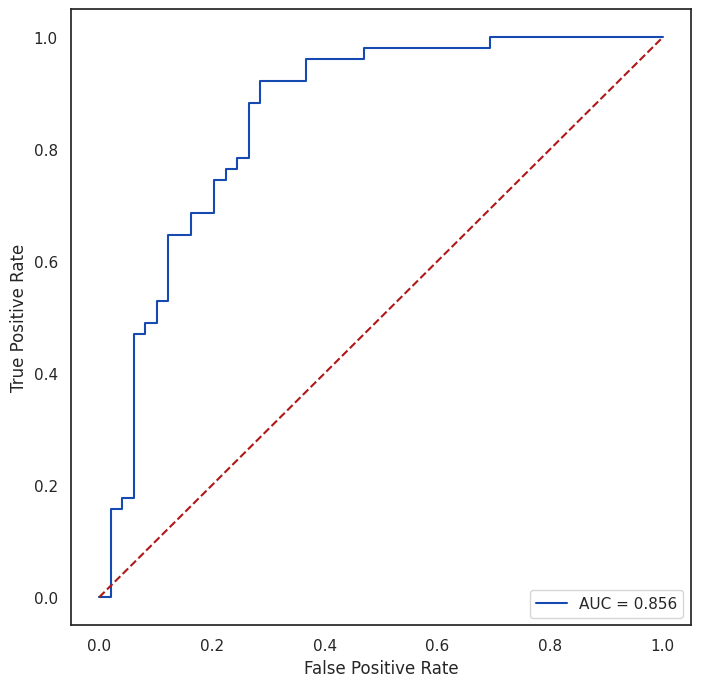

In [166]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred_prob_log_feat)
roc_auc_log_feat = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#174ab0', label = 'AUC = %0.3f' % roc_auc_log_feat)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#b01717')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROC_RUS_feat_log.jpg')
plt.show()

Figure above shows a more detailed version of the ROC for Logistic Regression with RUS with feature selection, with the blue line representing the ROC for Logistic Regression with RUS with feature selection and the Redline representing the ROC of random chance.

AUC of Logistic Regression with RUS with feature selection was found to be 0.856, which can be considered a good distribution (0.8 - 0.9 AUC) based on the rule of thumb of deciles from Hosmer and Lemeshow.

Text(0.5, 1.0, 'Confusion Matrix')

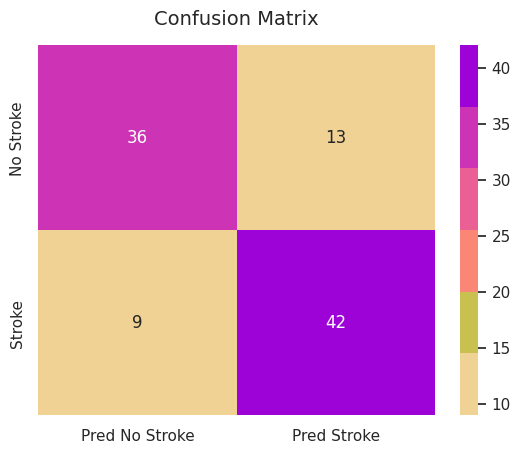

In [167]:
sns.heatmap(
    confusion_matrix(Y_feat_test, y_feat_pred_log),
    cmap = palette,
    annot = True,
    fmt = 'd',
    yticklabels = ['No Stroke', 'Stroke'],
    xticklabels = ['Pred No Stroke', 'Pred Stroke']
)
plt.title('Confusion Matrix', pad = 15, fontsize = 14)

In [168]:
lr_feat_scores = cross_val_score(log_feat, X=X_feat_train, y=Y_feat_train, cv=5)
lr_feat_avg_score = lr_feat_scores.mean()
lr_feat_avg_score

0.758987341772152

Based on the value of the mean of cross validation score with 5 folds, it is determined that the K-fold validation value of Logistic Regression with RUS with feature selection is 0.759, showing a decent performance of the machine learning algorithm on a dataset.

### Random Forest Classifier

In [169]:
rf_feat = RandomForestClassifier()
rf_feat.fit(X_feat_train, Y_feat_train)

#Test set prediction
y_feat_pred_rf = rf_feat.predict(X_feat_test)
y_pred_prob_rf_feat = rf_feat.predict_proba(X_feat_test)[:, 1]
cr_rf_feat = classification_report(Y_feat_test, y_feat_pred_rf)
print(cr_rf_feat)

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        49
           1       0.75      0.82      0.79        51

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100



In [170]:
print('Precision Score: ', round(precision_score(Y_feat_test, y_feat_pred_rf), 2))
print('Recall Score: ', round(recall_score(Y_feat_test, y_feat_pred_rf), 2))
print('F1 Score: ', round(f1_score(Y_feat_test, y_feat_pred_rf), 2))
rf_feat_accuracy = accuracy_score(Y_feat_test, y_feat_pred_rf)
print(f"Accuracy Score: {rf_feat_accuracy * 100:.2f}%")
print('ROC AUC: ', round(roc_auc_score(Y_feat_test, y_pred_prob_rf_feat), 2))

Precision Score:  0.75
Recall Score:  0.82
F1 Score:  0.79
Accuracy Score: 77.00%
ROC AUC:  0.84


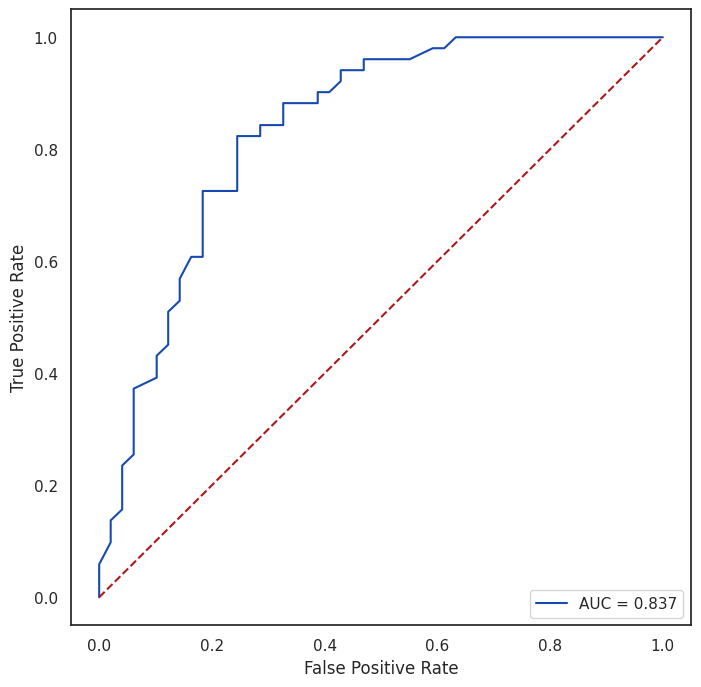

In [171]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred_prob_rf_feat)
roc_auc_rf_feat = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#174ab0', label = 'AUC = %0.3f' % roc_auc_rf_feat)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#b01717')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROC_RUS_feat_rf.jpg')
plt.show()

Figure above shows a more detailed version of the ROC for Random Forest Classifier with RUS with feature selection, with the blue line representing the ROC for Random Forest Classifier with RUS with feature selection and the Redline representing the ROC of random chance.

AUC of Random Forest Classifier with RUS with feature selection was found to be 0.839, which can be considered a good distribution (0.8 - 0.9 AUC) based on the rule of thumb of deciles from Hosmer and Lemeshow.




Text(0.5, 1.0, 'Confusion Matrix')

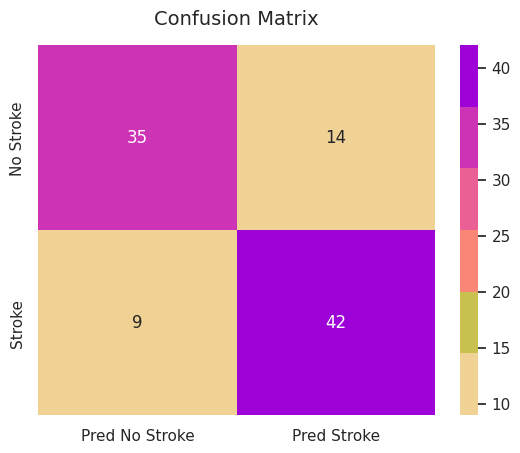

In [172]:
sns.heatmap(
    confusion_matrix(Y_feat_test, y_feat_pred_rf),
    cmap = palette,
    annot = True,
    fmt = 'd',
    yticklabels = ['No Stroke', 'Stroke'],
    xticklabels = ['Pred No Stroke', 'Pred Stroke']
)
plt.title('Confusion Matrix', pad = 15, fontsize = 14)

In [173]:
rf_feat_scores = cross_val_score(rf_feat, X=X_feat_train, y=Y_feat_train, cv=5)
rf_feat_avg_score = rf_feat_scores.mean()
rf_feat_avg_score

0.7336708860759493

Based on the value of the mean of cross validation score with 5 folds, it is determined that the K-fold validation value of Random Forest Classifier with RUS with feature selection is 0.7438, showing a decent performance of the machine learning algorithm on a dataset.

### K-Nearest Neighbors

In [174]:
knn_feat = KNeighborsClassifier()
knn_feat.fit(X_feat_train, Y_feat_train)

y_feat_pred_knn = knn_feat.predict(X_feat_test)
y_pred_prob_knn_feat = knn_feat.predict_proba(X_feat_test)[:, 1]
cr_knn_feat = classification_report(Y_feat_test, y_feat_pred_knn)
print(cr_knn_feat)

              precision    recall  f1-score   support

           0       0.78      0.63      0.70        49
           1       0.70      0.82      0.76        51

    accuracy                           0.73       100
   macro avg       0.74      0.73      0.73       100
weighted avg       0.74      0.73      0.73       100



In [175]:
print('Precision Score: ', round(precision_score(Y_feat_test, y_feat_pred_knn), 2))
print('Recall Score: ', round(recall_score(Y_feat_test, y_feat_pred_knn), 2))
print('F1 Score: ', round(f1_score(Y_feat_test, y_feat_pred_knn), 2))
knn_feat_accuracy = accuracy_score(Y_feat_test, y_feat_pred_knn)
print(f"Accuracy Score: {knn_feat_accuracy * 100:.2f}%")
print('ROC AUC: ', round(roc_auc_score(Y_feat_test, y_pred_prob_knn_feat), 2))

Precision Score:  0.7
Recall Score:  0.82
F1 Score:  0.76
Accuracy Score: 73.00%
ROC AUC:  0.76


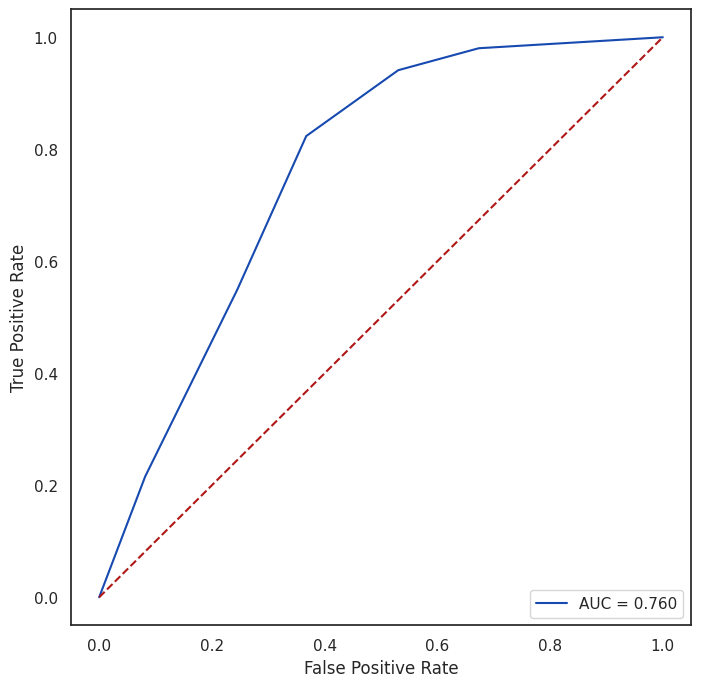

In [176]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred_prob_knn_feat)
roc_auc_knn_feat = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#174ab0', label = 'AUC = %0.3f' % roc_auc_knn_feat)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#b01717')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROC_RUS_feat_knn.jpg')
plt.show()

Figure above shows a more detailed version of the ROC for K - Nearest Neighbours with RUS with feature selection, with the blue line representing the ROC for K - Nearest Neighbours with RUS with feature selection and the Redline representing the ROC of random chance.

AUC of K - Nearest Neighbours with RUS with feature selection was found to be 0.760, which can be considered a fair score (0.8 - 0.9 AUC) based on the rule of thumb of deciles from Hosmer and Lemeshow.


Text(0.5, 1.0, 'Confusion Matrix')

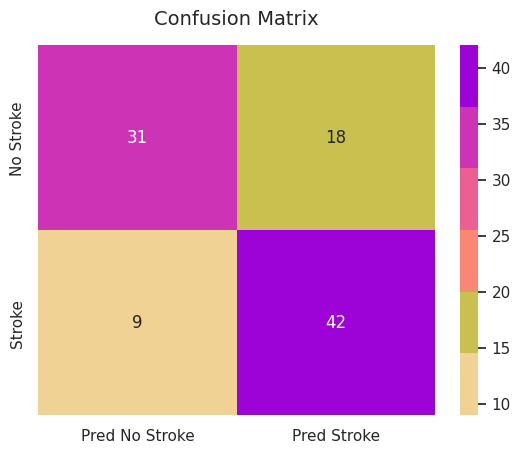

In [177]:
sns.heatmap(
    confusion_matrix(Y_feat_test, y_feat_pred_knn),
    cmap = palette,
    annot = True,
    fmt = 'd',
    yticklabels = ['No Stroke', 'Stroke'],
    xticklabels = ['Pred No Stroke', 'Pred Stroke']
)
plt.title('Confusion Matrix', pad = 15, fontsize = 14)

In [178]:
knn_feat_scores = cross_val_score(knn_feat, X=X_feat_train, y=Y_feat_train, cv=5)
knn_feat_avg_score = knn_feat_scores.mean()
knn_feat_avg_score

0.7212658227848101

Based on the value of the mean of cross validation score with 5 folds, it is determined that the K-fold validation value of K - Nearest Neighbours with RUS with feature selection is 0.7212, indicating a decent performance of the machine learning algorithm on a dataset.

### Decision Tree Classifier

In [179]:
dtc_feat = DecisionTreeClassifier()
dtc_feat.fit(X_feat_train, Y_feat_train)

#Test set prediction
y_feat_pred_dtc = dtc_feat.predict(X_feat_test)
y_pred_prob_dtc_feat = dtc_feat.predict_proba(X_feat_test)[:, 1]
cr_dtc_feat = classification_report(Y_feat_test, y_feat_pred_dtc)
print(cr_dtc_feat)

              precision    recall  f1-score   support

           0       0.62      0.65      0.63        49
           1       0.65      0.61      0.63        51

    accuracy                           0.63       100
   macro avg       0.63      0.63      0.63       100
weighted avg       0.63      0.63      0.63       100



In [180]:
print('Precision Score: ', round(precision_score(Y_feat_test, y_feat_pred_dtc), 2))
print('Recall Score: ', round(recall_score(Y_feat_test, y_feat_pred_dtc), 2))
print('F1 Score: ', round(f1_score(Y_feat_test, y_feat_pred_dtc), 2))
dtc_feat_accuracy = accuracy_score(Y_feat_test, y_feat_pred_dtc)
print(f"Accuracy Score: {dtc_feat_accuracy * 100:.2f}%")
print('ROC AUC: ', round(roc_auc_score(Y_feat_test, y_pred_prob_dtc_feat), 2))

Precision Score:  0.65
Recall Score:  0.61
F1 Score:  0.63
Accuracy Score: 63.00%
ROC AUC:  0.63


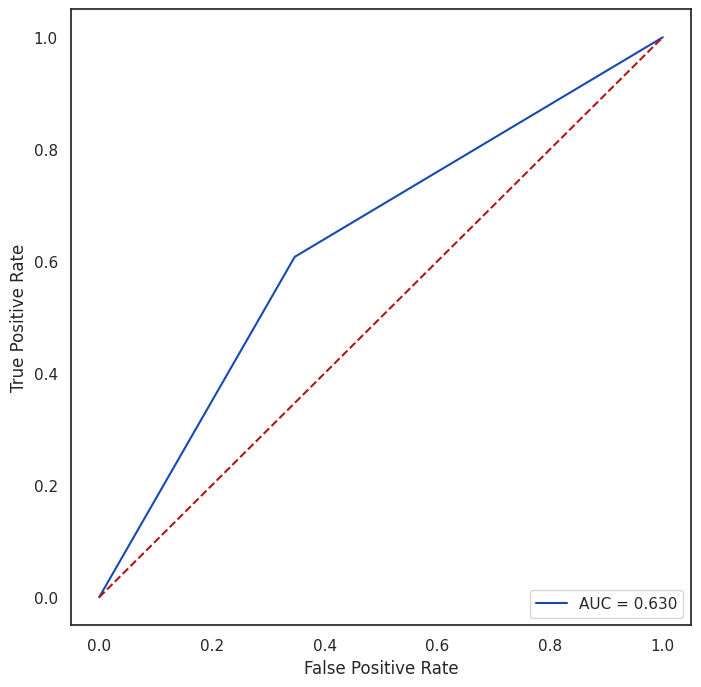

In [181]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred_prob_dtc_feat)
roc_auc_dtc_feat = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#174ab0', label = 'AUC = %0.3f' % roc_auc_dtc_feat)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#b01717')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROC_RUS_feat_dtc.jpg')
plt.show()

Figure above shows a more detailed version of the ROC for Decision Tree Classifier with RUS with feature selection, with the blue line representing the ROC for Decision Tree Classifier with RUS with feature selection and the Redline representing the ROC of random chance.

AUC of Decision Tree Classifier with RUS with feature selection was found to be 0.650, which can be considered a poor score (0.6 - 0.7 AUC) based on the rule of thumb of deciles from Hosmer and Lemeshow.

Text(0.5, 1.0, 'Confusion Matrix')

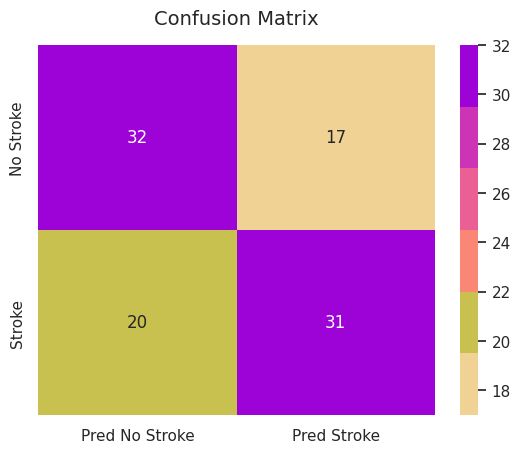

In [182]:
sns.heatmap(
    confusion_matrix(Y_feat_test, y_feat_pred_dtc),
    cmap = palette,
    annot = True,
    fmt = 'd',
    yticklabels = ['No Stroke', 'Stroke'],
    xticklabels = ['Pred No Stroke', 'Pred Stroke']
)
plt.title('Confusion Matrix', pad = 15, fontsize = 14)

In [183]:
dtc_feat_scores = cross_val_score(dtc_feat, X=X_feat_train, y=Y_feat_train, cv=5)
dtc_feat_avg_score = dtc_feat_scores.mean()
dtc_feat_avg_score

0.6581645569620254

Based on the value of the mean of cross validation score with 5 folds, it is determined that the K-fold validation value of Decision Tree Classifier with RUS with feature selection is 0.6657, indicating bad performance of the machine learning algorithm on a dataset.

### Naive Bayes

In [184]:
nb_feat = GaussianNB()
nb_feat.fit(X_feat_train, Y_feat_train)

#Test set prediction
y_feat_pred_nb = nb_feat.predict(X_feat_test)
y_pred_prob_nb_feat = nb_feat.predict_proba(X_feat_test)[:, 1]
cr_nb_feat = classification_report(Y_feat_test, y_feat_pred_nb)
print(cr_nb_feat)

              precision    recall  f1-score   support

           0       0.66      0.86      0.74        49
           1       0.81      0.57      0.67        51

    accuracy                           0.71       100
   macro avg       0.73      0.71      0.71       100
weighted avg       0.73      0.71      0.70       100



In [185]:
print('Precision Score: ', round(precision_score(Y_feat_test, y_feat_pred_nb), 2))
print('Recall Score: ', round(recall_score(Y_feat_test, y_feat_pred_nb), 2))
print('F1 Score: ', round(f1_score(Y_feat_test, y_feat_pred_nb), 2))
nb_feat_accuracy = accuracy_score(Y_feat_test, y_feat_pred_nb)
print(f"Accuracy Score: {nb_feat_accuracy * 100:.2f}%")
print('ROC AUC: ', round(roc_auc_score(Y_feat_test, y_pred_prob_nb_feat), 2))

Precision Score:  0.81
Recall Score:  0.57
F1 Score:  0.67
Accuracy Score: 71.00%
ROC AUC:  0.85


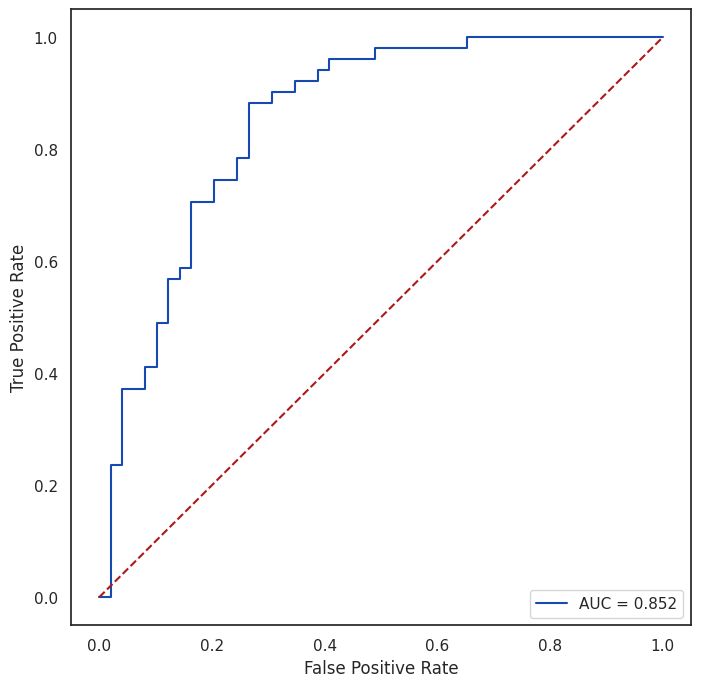

In [186]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred_prob_nb_feat)
roc_auc_nb_feat = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#174ab0', label = 'AUC = %0.3f' % roc_auc_nb_feat)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#b01717')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROC_RUS_feat_nb.jpg')
plt.show()

Figure above shows a more detailed version of the ROC for Naive Bayers Classifier with RUS with feature selection, with the blue line representing the ROC for Naive Bayers Classifier with RUS with feature selection and the Redline representing the ROC of random chance.

AUC of Naive Bayers Classifier with RUS with feature selection was found to be 0.852, which can be considered a good score (0.8 - 0.9 AUC) based on the rule of thumb of deciles from Hosmer and Lemeshow.


Text(0.5, 1.0, 'Confusion Matrix')

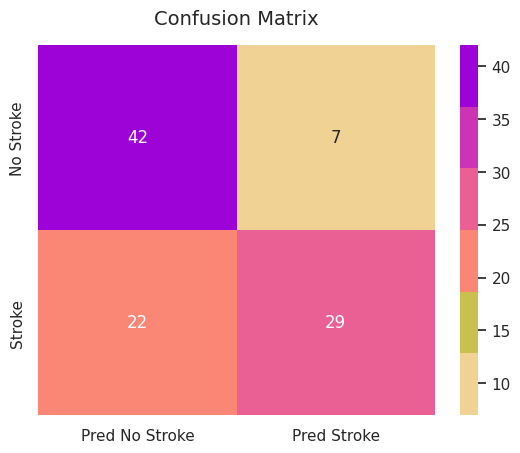

In [187]:
sns.heatmap(
    confusion_matrix(Y_feat_test, y_feat_pred_nb),
    cmap = palette,
    annot = True,
    fmt = 'd',
    yticklabels = ['No Stroke', 'Stroke'],
    xticklabels = ['Pred No Stroke', 'Pred Stroke']
)
plt.title('Confusion Matrix', pad = 15, fontsize = 14)

In [188]:
nb_feat_scores = cross_val_score(nb_feat, X=X_feat_train, y=Y_feat_train, cv=5)
nb_feat_avg_score = nb_feat_scores.mean()
nb_feat_avg_score

0.6783544303797469

Based on the value of the mean of cross validation score with 5 folds, it is determined that the K-fold validation value of Naive Bayers Classifier with RUS with feature selection is 0.6784, indicating bad performance of the machine learning algorithm on a dataset.

In [189]:
model_names_feat = ['Logistic Regresstion', 'Naive Bayes', 'K-Nearest Neighbours', 'Decision Tree Classifier', 'Random Forest Classifier']
accuracies_feat = [lr_feat_accuracy, nb_feat_accuracy, knn_feat_accuracy, dtc_feat_accuracy, rf_feat_accuracy]
kfold_validation_feat = [lr_feat_avg_score, nb_feat_avg_score, knn_feat_avg_score, dtc_feat_avg_score, rf_feat_avg_score]
roc_scores_feat = [roc_auc_score(Y_feat_test, y_pred_prob_log_feat), roc_auc_score(Y_feat_test, y_pred_prob_nb_feat), roc_auc_score(Y_feat_test, y_pred_prob_knn_feat), roc_auc_score(Y_feat_test, y_pred_prob_dtc_feat), roc_auc_score(Y_feat_test, y_pred_prob_rf_feat)]
precision_scores_feat = [precision_score(Y_feat_test, y_feat_pred_log), precision_score(Y_feat_test, y_feat_pred_nb), precision_score(Y_feat_test, y_feat_pred_knn), precision_score(Y_feat_test, y_feat_pred_dtc), precision_score(Y_feat_test, y_feat_pred_rf)]
recall_scores_feat = [recall_score(Y_feat_test, y_feat_pred_log), recall_score(Y_feat_test, y_feat_pred_nb), recall_score(Y_feat_test, y_feat_pred_knn), recall_score(Y_feat_test, y_feat_pred_dtc), recall_score(Y_feat_test, y_feat_pred_rf)]
f1_scores_feat = [f1_score(Y_feat_test, y_feat_pred_log), f1_score(Y_feat_test, y_feat_pred_nb), f1_score(Y_feat_test, y_feat_pred_knn), f1_score(Y_feat_test, y_feat_pred_dtc), f1_score(Y_feat_test, y_feat_pred_rf)]
accuracy_table_feat = pd.DataFrame({'Model':model_names_feat, 'Accuracy':accuracies_feat,'K-Fold Validation':kfold_validation_feat, 'ROC Score':roc_scores_feat, 'Precision':precision_scores_feat,'Recall':recall_scores_feat, 'F1 Score':f1_scores_feat})
accuracy_table_feat = accuracy_table_feat.sort_values(by=['Accuracy','K-Fold Validation','ROC Score','Precision','Recall','F1 Score'], axis=0, ascending = False)
accuracy_table_feat.reset_index(inplace = True, drop=True)
accuracy_table_feat.index += 1
accuracy_table_feat

,Model,Accuracy,K-Fold Validation,ROC Score,Precision,Recall,F1 Score
1,Logistic Regresstion,0.78,0.758987,0.855942,0.763636,0.823529,0.792453
2,Random Forest Classifier,0.77,0.733671,0.836735,0.750000,0.823529,0.785047
3,K-Nearest Neighbours,0.73,0.721266,0.759904,0.700000,0.823529,0.756757
4,Naive Bayes,0.71,0.678354,0.852341,0.805556,0.568627,0.666667
5,Decision Tree Classifier,0.63,0.658165,0.630452,0.645833,0.607843,0.626263


In [191]:
dfi.export(accuracy_table_feat, 'rus_feat.png')

NameError: name 'dfi' is not defined

### Model Development with SMOTE without feature selection

In [198]:
#Dropping the target variable
X_smote = sdf.drop('stroke', axis = 1)

NameError: name 'sdf' is not defined

In [ ]:
X_smote.head()

In [ ]:
Y_smote = sdf['stroke']
Y_smote.head()

In [ ]:
#Split the data by allocating 80% for training dataset and the remaining 20% for testing dataset
X_smote_train, X_smote_test, Y_smote_train, Y_smote_test = train_test_split(X_smote, Y_smote, test_size = 0.2, random_state = 0)

In [ ]:
#Display all the sizes of the training and testing dataset
print ('The size of our training "X" (input features) is', X_smote_train.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', X_smote_test.shape)
print ('\n')
print ('The size of our training "Y" (output feature) is', Y_smote_train.shape)
print ('\n')
print ('The size of our testing "Y" (output features) is', Y_smote_test.shape)

### Logistic Regression

In [197]:
log_smote = LogisticRegression(solver='lbfgs', max_iter=10000)
log_smote.fit(X_smote_train, Y_smote_train)

#Test set prediction
y_smote_pred_log = log_smote.predict(X_smote_test)
y_pred_prob_log_smote = log_smote.predict_proba(X_smote_test)[:, 1]
cr_smote = classification_report(Y_smote_test, y_smote_pred_log)
print(cr_smote)

NameError: name 'X_smote_train' is not defined

In [ ]:
print('Precision Score: ', round(precision_score(Y_smote_test, y_smote_pred_log), 2))
print('Recall Score: ', round(recall_score(Y_smote_test, y_smote_pred_log), 2))
print('F1 Score: ', round(f1_score(Y_smote_test, y_smote_pred_log), 2))
lr_smote_accuracy = round(accuracy_score(Y_smote_test, y_smote_pred_log),2)
print(f"Accuracy Score: {lr_smote_accuracy * 100:.2f}%")
print('ROC AUC: ', round(roc_auc_score(Y_smote_test, y_pred_prob_log_smote), 2))

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_smote_test, y_pred_prob_log_smote)
roc_auc_log_smote = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#174ab0', label = 'AUC = %0.3f' % roc_auc_log_smote)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#b01717')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROC_SMOTE_log.jpg')
plt.show()

Figure above shows a more detailed version of the ROC for Logistic Regression with SMOTE without feature selection, with the blue line representing the ROC for Logistic Regression with SMOTE without feature selection and the Redline representing the ROC of random chance.

AUC of Logistic Regression with SMOTE without feature selection was found to be 0.852, which can be considered a good score (0.8 - 0.9 AUC) based on the rule of thumb of deciles from Hosmer and Lemeshow.


In [ ]:
sns.heatmap(
    confusion_matrix(Y_smote_test, y_smote_pred_log),
    cmap = palette,
    annot = True,
    fmt = 'd',
    yticklabels = ['No Stroke', 'Stroke'],
    xticklabels = ['Pred No Stroke', 'Pred Stroke']
)
plt.title('Confusion Matrix', pad = 15, fontsize = 14)

In [ ]:
lr_smote_scores = cross_val_score(log_smote, X=X_smote_train, y=Y_smote_train, cv=5)
lr_smote_avg_score = lr_smote_scores.mean()
lr_smote_avg_score

Based on the value of the mean of cross validation score with 5 folds, it is determined that the K-fold validation value of Logistic Regression with SMOTE without feature selection is 0.801, indicating good performance of the machine learning algorithm on a dataset.

### Random Forest Classifier

In [195]:
rf_smote = RandomForestClassifier()
rf_smote.fit(X_smote_train, Y_smote_train)

#Test set prediction
y_smote_pred_rf = rf_smote.predict(X_smote_test)
y_pred_prob_rf_smote = rf_smote.predict_proba(X_smote_test)[:, 1]
cr_smote_rf = classification_report(Y_smote_test, y_smote_pred_rf)
print(cr_smote_rf)

NameError: name 'X_smote_train' is not defined

In [ ]:
print('Precision Score: ', round(precision_score(Y_smote_test, y_smote_pred_rf), 2))
print('Recall Score: ', round(recall_score(Y_smote_test, y_smote_pred_rf), 2))
print('F1 Score: ', round(f1_score(Y_smote_test, y_smote_pred_rf), 2))
rf_smote_accuracy = round(accuracy_score(Y_smote_test, y_smote_pred_rf),2)
print(f"Accuracy Score: {rf_smote_accuracy * 100:.2f}%")
print('ROC AUC: ', round(roc_auc_score(Y_smote_test, y_pred_prob_rf_smote), 2))

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_smote_test, y_pred_prob_rf_smote)
roc_auc_rf_smote = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#174ab0', label = 'AUC = %0.3f' % roc_auc_rf_smote)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#b01717')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROC_SMOTE_rf.jpg')
plt.show()

Figure above shows a more detailed version of the ROC for Random Forest Classifier with SMOTE without feature selection, with the blue line representing the ROC for Random Forest Classifier with SMOTE without feature selection and the Redline representing the ROC of random chance.

AUC of Random Forest Classifier with SMOTE without feature selection was found to be 0.988, which can be considered an excellent score (0.9 - 1.0 AUC) based on the rule of thumb of deciles from Hosmer and Lemeshow.

In [ ]:
sns.heatmap(
    confusion_matrix(Y_smote_test, y_smote_pred_rf),
    cmap = palette,
    annot = True,
    fmt = 'd',
    yticklabels = ['No Stroke', 'Stroke'],
    xticklabels = ['Pred No Stroke', 'Pred Stroke']
)
plt.title('Confusion Matrix', pad = 15, fontsize = 14)

In [ ]:
rf_smote_scores = cross_val_score(rf_smote, X=X_smote_train, y=Y_smote_train, cv=5)
rf_smote_avg_score = rf_smote_scores.mean()
rf_smote_avg_score

Based on the value of the mean of cross validation score with 5 folds, it is determined that the K-fold validation value of Random Forest Classifier is 0.935, indicating an excellent performance of the machine learning algorithm on a dataset.

### K-Nearest Neighbors

In [196]:
knn_smote = KNeighborsClassifier()
knn_smote.fit(X_smote_train, Y_smote_train)

y_smote_pred_knn = knn_smote.predict(X_smote_test)
y_pred_prob_knn_smote = knn_smote.predict_proba(X_smote_test)[:, 1]
cr_smote_knn = classification_report(Y_smote_test, y_smote_pred_knn)
print(cr_smote_knn)

NameError: name 'X_smote_train' is not defined

In [ ]:
print('Precision Score: ', round(precision_score(Y_smote_test, y_smote_pred_knn), 2))
print('Recall Score: ', round(recall_score(Y_smote_test, y_smote_pred_knn), 2))
print('F1 Score: ', round(f1_score(Y_smote_test, y_smote_pred_knn), 2))
knn_smote_accuracy = round(accuracy_score(Y_smote_test, y_smote_pred_knn),2)
print(f"Accuracy Score: {knn_smote_accuracy * 100:.2f}%")
print('ROC AUC: ', round(roc_auc_score(Y_smote_test, y_pred_prob_knn_smote), 2))

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_smote_test, y_pred_prob_knn_smote)
roc_auc_knn_smote = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#174ab0', label = 'AUC = %0.3f' % roc_auc_knn_smote)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#b01717')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROC_SMOTE_knn.jpg')
plt.show()

Figure above shows a more detailed version of the ROC for K - Nearest Neighbours with SMOTE without feature selection, with the blue line representing the ROC for K - Nearest Neighbours with SMOTE without feature selection and the Redline representing the ROC of random chance.

AUC of K - Nearest Neighbours with SMOTE without feature selection was found to be 0.954, which can be considered an excellent score (0.9 - 1.0 AUC) based on the rule of thumb of deciles from Hosmer and Lemeshow.

In [ ]:
sns.heatmap(
    confusion_matrix(Y_smote_test, y_smote_pred_knn),
    cmap = palette,
    annot = True,
    fmt = 'd',
    yticklabels = ['No Stroke', 'Stroke'],
    xticklabels = ['Pred No Stroke', 'Pred Stroke']
)
plt.title('Confusion Matrix', pad = 15, fontsize = 14)

In [ ]:
knn_smote_scores = cross_val_score(knn_smote, X=X_smote_train, y=Y_smote_train, cv=5)
knn_smote_avg_score = knn_smote_scores.mean()
knn_smote_avg_score

Based on the value of the mean of cross validation score with 5 folds, it is determined that the K-fold validation value of K - Nearest Neighbours with SMOTE without feature selection is 0.8857, indicating good performance of the machine learning algorithm on a dataset.

### Decision Tree Classifier

In [ ]:
dtc_smote = DecisionTreeClassifier()
dtc_smote.fit(X_smote_train, Y_smote_train)

#Test set prediction
y_smote_pred_dtc = dtc_smote.predict(X_smote_test)
y_pred_prob_dtc_smote = dtc_smote.predict_proba(X_smote_test)[:, 1]
cr_smote_dtc = classification_report(Y_smote_test, y_smote_pred_dtc)
print(cr_smote_dtc)

In [ ]:
print('Precision Score: ', round(precision_score(Y_smote_test, y_smote_pred_dtc), 2))
print('Recall Score: ', round(recall_score(Y_smote_test, y_smote_pred_dtc), 2))
print('F1 Score: ', round(f1_score(Y_smote_test, y_smote_pred_dtc), 2))
dtc_smote_accuracy = round(accuracy_score(Y_smote_test, y_smote_pred_dtc),2)
print(f"Accuracy Score: {dtc_smote_accuracy * 100:.2f}%")
print('ROC AUC: ', round(roc_auc_score(Y_smote_test, y_pred_prob_dtc_smote), 2))

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_smote_test, y_pred_prob_dtc_smote)
roc_auc_dtc_smote = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#174ab0', label = 'AUC = %0.3f' % roc_auc_dtc_smote)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#b01717')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROC_SMOTE_rf.jpg')
plt.show()

Figure above shows a more detailed version of the ROC for Decision Tree Classifier with SMOTE without feature selection, with the blue line representing the ROC for Decision Tree Classifier with SMOTE without feature selection and the Redline representing the ROC of random chance.

AUC of Decision Tree Classifier  with SMOTE without feature selection was found to be 0.895, which can be considered a good score (0.8 - 0.9 AUC) based on the rule of thumb of deciles from Hosmer and Lemeshow.

In [ ]:
sns.heatmap(
    confusion_matrix(Y_smote_test, y_smote_pred_dtc),
    cmap = palette,
    annot = True,
    fmt = 'd',
    yticklabels = ['No Stroke', 'Stroke'],
    xticklabels = ['Pred No Stroke', 'Pred Stroke']
)
plt.title('Confusion Matrix', pad = 15, fontsize = 14)

In [ ]:
dtc_smote_scores = cross_val_score(dtc_smote, X=X_smote_train, y=Y_smote_train, cv=5)
dtc_smote_avg_score = dtc_smote_scores.mean()
dtc_smote_avg_score

Based on the value of the mean of cross validation score with 5 folds, it is determined that the K-fold validation value of Decision Tree Classifier with SMOTE without feature selection is 0.895, indicating good performance of the machine learning algorithm on a dataset.

### Naive Bayes

In [ ]:
nb_smote = GaussianNB()
nb_smote.fit(X_smote_train, Y_smote_train)

#Test set prediction
y_smote_pred_nb = nb_smote.predict(X_smote_test)
y_pred_prob_nb_smote = nb_smote.predict_proba(X_smote_test)[:, 1]
cr_smote_nb = classification_report(Y_smote_test, y_smote_pred_nb)
print(cr_smote_nb)

In [ ]:
print('Precision Score: ', round(precision_score(Y_smote_test, y_smote_pred_nb), 2))
print('Recall Score: ', round(recall_score(Y_smote_test, y_smote_pred_nb), 2))
print('F1 Score: ', round(f1_score(Y_smote_test, y_smote_pred_nb), 2))
nb_smote_accuracy = round(accuracy_score(Y_smote_test, y_smote_pred_nb),2)
print(f"Accuracy Score: {nb_smote_accuracy * 100:.2f}%")
print('ROC AUC: ', round(roc_auc_score(Y_smote_test, y_pred_prob_nb_smote), 2))

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_smote_test, y_pred_prob_nb_smote)
roc_auc_nb_smote = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#174ab0', label = 'AUC = %0.3f' % roc_auc_nb_smote)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#b01717')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROC_SMOTE_nb.jpg')
plt.show()

Figure above shows a more detailed version of the ROC for Naive Bayes Classifier with SMOTE without feature selection, with the blue line representing the ROC for Naive Bayes Classifier with SMOTE without feature selection, and the Redline representing the ROC of random chance.

AUC of Naive Bayes Classifier with SMOTE without feature selection, was found to be 0.872, which can be considered a good score (0.8 - 0.9 AUC) based on the rule of thumb of deciles from Hosmer and Lemeshow.

In [ ]:
sns.heatmap(
    confusion_matrix(Y_smote_test, y_smote_pred_nb),
    cmap = palette,
    annot = True,
    fmt = 'd',
    yticklabels = ['No Stroke', 'Stroke'],
    xticklabels = ['Pred No Stroke', 'Pred Stroke']
)
plt.title('Confusion Matrix', pad = 15, fontsize = 14)

In [ ]:
nb_smote_scores = cross_val_score(nb_smote, X=X_smote_train, y=Y_smote_train, cv=5)
nb_smote_avg_score = nb_smote_scores.mean()
nb_smote_avg_score

Based on the value of the mean of cross validation score with 5 folds, it is determined that the K-fold validation value of K - Nearest Neighbours With SMOTE with feature selection is 0.791, indicating Decent performance of the machine learning algorithm on a dataset.


In [ ]:
model_names_smote = ['Logistic Regresstion', 'Naive Bayes', 'K-Nearest Neighbours', 'Decision Tree Classifier', 'Random Forest Classifier']
accuracies_smote = [lr_smote_accuracy, nb_smote_accuracy, knn_smote_accuracy, dtc_smote_accuracy, rf_smote_accuracy]
kfold_validation_smote = [lr_smote_avg_score, nb_smote_avg_score, knn_smote_avg_score, dtc_smote_avg_score, rf_smote_avg_score]
roc_scores_smote = [roc_auc_score(Y_smote_test, y_pred_prob_log_smote), roc_auc_score(Y_smote_test, y_pred_prob_nb_smote), roc_auc_score(Y_smote_test, y_pred_prob_knn_smote), roc_auc_score(Y_smote_test, y_pred_prob_dtc_smote), roc_auc_score(Y_smote_test, y_pred_prob_rf_smote)]
precision_scores_smote = [precision_score(Y_smote_test, y_smote_pred_log), precision_score(Y_smote_test, y_smote_pred_nb), precision_score(Y_smote_test, y_smote_pred_knn), precision_score(Y_smote_test, y_smote_pred_dtc), precision_score(Y_smote_test, y_smote_pred_rf)]
recall_scores_smote = [recall_score(Y_smote_test, y_smote_pred_log), recall_score(Y_smote_test, y_smote_pred_nb), recall_score(Y_smote_test, y_smote_pred_knn), recall_score(Y_smote_test, y_smote_pred_dtc), recall_score(Y_smote_test, y_smote_pred_rf)]
f1_scores_smote = [f1_score(Y_smote_test, y_smote_pred_log), f1_score(Y_smote_test, y_smote_pred_nb), f1_score(Y_smote_test, y_smote_pred_knn), f1_score(Y_smote_test, y_smote_pred_dtc), f1_score(Y_smote_test, y_smote_pred_rf)]
accuracy_table_smote = pd.DataFrame({'Model':model_names_smote, 'Accuracy':accuracies_smote,'K-Fold Validation':kfold_validation_smote, 'ROC Score':roc_scores_smote, 'Precision':precision_scores_smote,'Recall':recall_scores_smote, 'F1 Score':f1_scores_smote})
accuracy_table_smote = accuracy_table_smote.sort_values(by=['Accuracy','K-Fold Validation','ROC Score','Precision','Recall','F1 Score'], axis=0, ascending = False)
accuracy_table_smote.reset_index(inplace = True, drop=True)
accuracy_table_smote.index += 1
accuracy_table_smote

In [ ]:
dfi.export(accuracy_table_smote, 'smote.png')

### Model Development with SMOTE with feature selection

In [ ]:
x_smote_feat = sdf[['age','hypertension','heart_disease','work_type','avg_glucose_level','bmi','smoking_status']]
y_smote_feat = sdf['stroke']

In [ ]:
x_smote_feat.head()

In [ ]:
y_smote_feat.head()

In [ ]:
#Split the data by allocating 80% for training dataset and the remaining 20% for testing dataset
X_smote_feat_train, X_smote_feat_test, Y_smote_feat_train, Y_smote_feat_test = train_test_split(x_smote_feat, y_smote_feat, test_size = 0.2, random_state = 0)

In [ ]:
#Display all the sizes of the training and testing dataset
print ('The size of our training "X" (input features) is', X_smote_feat_train.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', X_smote_feat_test.shape)
print ('\n')
print ('The size of our training "Y" (output feature) is', Y_smote_feat_train.shape)
print ('\n')
print ('The size of our testing "Y" (output features) is', Y_smote_feat_test.shape)

### Logistic Regression

In [ ]:
log_smote_feat = LogisticRegression(solver='lbfgs', max_iter=10000)
log_smote_feat.fit(X_smote_feat_train, Y_smote_feat_train)

#Test set prediction
y_smote_feat_pred_log = log_smote_feat.predict(X_smote_feat_test)
y_pred_prob_log_smote_feat = log_smote_feat.predict_proba(X_smote_feat_test)[:, 1]
cr_smote_lr_feat = classification_report(Y_smote_feat_test, y_smote_feat_pred_log)
print(cr_smote_lr_feat)

In [ ]:
print('Precision Score: ', round(precision_score(Y_smote_feat_test, y_smote_feat_pred_log), 2))
print('Recall Score: ', round(recall_score(Y_smote_feat_test, y_smote_feat_pred_log), 2))
print('F1 Score: ', round(f1_score(Y_smote_feat_test, y_smote_feat_pred_log), 2))
lr_smote_feat_accuracy = round(accuracy_score(Y_smote_feat_test, y_smote_feat_pred_log),2)
print(f"Accuracy Score: {lr_smote_feat_accuracy * 100:.2f}%")
print('ROC AUC: ', round(roc_auc_score(Y_smote_feat_test, y_pred_prob_log_smote_feat), 2))

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_smote_feat_test, y_pred_prob_log_smote_feat)
roc_auc_log_smote_feat = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#174ab0', label = 'AUC = %0.3f' % roc_auc_log_smote_feat)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#b01717')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROC_SMOTE_feat_log.jpg')
plt.show()

Figure above shows a more detailed version of the ROC for Logistic Regression with SMOTE with feature selection, with the blue line representing the ROC for Logistic Regression with SMOTE with feature selection and the Redline representing the ROC of random chance.

AUC of Logistic Regression with SMOTE with feature selection was found to be 0.852, which can be considered a good score (0.8 - 0.9 AUC) based on the rule of thumb of deciles from Hosmer and Lemeshow.


In [ ]:
sns.heatmap(
    confusion_matrix(Y_smote_feat_test, y_smote_feat_pred_log),
    cmap = palette,
    annot = True,
    fmt = 'd',
    yticklabels = ['No Stroke', 'Stroke'],
    xticklabels = ['Pred No Stroke', 'Pred Stroke']
)
plt.title('Confusion Matrix', pad = 15, fontsize = 14)

In [ ]:
lr_smote_feat_scores = cross_val_score(log_smote_feat, X=X_smote_feat_train, y=Y_smote_feat_train, cv=5)
lr_smote_feat_avg_score = lr_smote_feat_scores.mean()
lr_smote_feat_avg_score

Based on the value of the mean of cross validation score with 5 folds, it is determined that the K-fold validation value of Logistic Regression with SMOTE with feature selection is 0.7920, indicating decent performance of the machine learning algorithm on a dataset.

### Random Forest Classifier

In [ ]:
rf_smote_feat = RandomForestClassifier()
rf_smote_feat.fit(X_smote_feat_train, Y_smote_feat_train)

#Test set prediction
y_smote_feat_pred_rf = rf_feat.predict(X_smote_feat_test)
y_pred_prob_rf_smote_feat = rf_smote_feat.predict_proba(X_smote_feat_test)[:, 1]
cr_smote_rf_feat = classification_report(Y_smote_feat_test, y_smote_feat_pred_rf)
print(cr_smote_rf_feat)

In [ ]:
print('Precision Score: ', round(precision_score(Y_smote_feat_test, y_smote_feat_pred_rf), 2))
print('Recall Score: ', round(recall_score(Y_smote_feat_test, y_smote_feat_pred_rf), 2))
print('F1 Score: ', round(f1_score(Y_smote_feat_test, y_smote_feat_pred_rf), 2))
rf_smote_feat_accuracy = round(accuracy_score(Y_smote_feat_test, y_smote_feat_pred_rf),2)
print(f"Accuracy Score: {rf_smote_feat_accuracy * 100:.2f}%")
print('ROC AUC: ', round(roc_auc_score(Y_smote_feat_test, y_pred_prob_rf_smote_feat), 2))

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_smote_feat_test, y_pred_prob_rf_smote_feat)
roc_auc_rf_smote_feat = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#174ab0', label = 'AUC = %0.3f' % roc_auc_rf_smote_feat)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#b01717')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROC_SMOTE_feat_rf.jpg')
plt.show()

Figure above shows a more detailed version of the ROC for Random Forest Classifier with SMOTE with feature selection, with the blue line representing the ROC for Random Forest Classifier with SMOTE with feature selection and the Redline representing the ROC of random chance.

AUC of Random Forest Classifier with SMOTE with feature selection was found to be 0.985, which can be considered an excellent score (0.9 - 1.0 AUC) based on the rule of thumb of deciles from Hosmer and Lemeshow.


In [ ]:
sns.heatmap(
    confusion_matrix(Y_smote_feat_test, y_smote_feat_pred_rf),
    cmap = palette,
    annot = True,
    fmt = 'd',
    yticklabels = ['No Stroke', 'Stroke'],
    xticklabels = ['Pred No Stroke', 'Pred Stroke']
)
plt.title('Confusion Matrix', pad = 15, fontsize = 14)

In [ ]:
rf_smote_feat_scores = cross_val_score(rf_smote_feat, X=X_smote_feat_train, y=Y_smote_feat_train, cv=5)
rf_smote_feat_avg_score = rf_smote_feat_scores.mean()
rf_smote_feat_avg_score

Based on the value of the mean of cross validation score with 5 folds, it is determined that the K-fold validation value of Random Forest Classifier with SMOTE with feature selection is 0.931, indicating excellent performance of the machine learning algorithm on a dataset.


### K-Nearest Neighbors

In [ ]:
knn_smote_feat = KNeighborsClassifier()
knn_smote_feat.fit(X_smote_feat_train, Y_smote_feat_train)

y_smote_feat_pred_knn = knn_smote_feat.predict(X_smote_feat_test)
y_pred_prob_knn_smote_feat = knn_smote_feat.predict_proba(X_smote_feat_test)[:, 1]
cr_smote_knn_feat = classification_report(Y_smote_feat_test, y_smote_feat_pred_knn)
print(cr_smote_knn_feat)

In [ ]:
print('Precision Score: ', round(precision_score(Y_smote_feat_test, y_smote_feat_pred_knn), 2))
print('Recall Score: ', round(recall_score(Y_smote_feat_test, y_smote_feat_pred_knn), 2))
print('F1 Score: ', round(f1_score(Y_smote_feat_test, y_smote_feat_pred_knn), 2))
knn_smote_feat_accuracy = round(accuracy_score(Y_smote_feat_test, y_smote_feat_pred_knn),2)
print(f"Accuracy Score: {knn_smote_feat_accuracy * 100:.2f}%")
print('ROC AUC: ', round(roc_auc_score(Y_smote_feat_test, y_pred_prob_knn_smote_feat), 2))

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_smote_feat_test, y_pred_prob_knn_smote_feat)
roc_auc_knn_smote_feat = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#174ab0', label = 'AUC = %0.3f' % roc_auc_knn_smote_feat)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#b01717')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROC_SMOTE_feat_knn.jpg')
plt.show()

Figure above shows a more detailed version of the ROC for K - Nearest Neighbours With SMOTE with feature selection, with the blue line representing the ROC for K - Nearest Neighbours With SMOTE with feature selection and the Redline representing the ROC of random chance.

AUC of K - Nearest Neighbours With SMOTE with feature selection was found to be 0.949, which can be considered an excellent score (0.9 - 1.0 AUC) based on the rule of thumb of deciles from Hosmer and Lemeshow.

In [ ]:
sns.heatmap(
    confusion_matrix(Y_smote_feat_test, y_smote_feat_pred_knn),
    cmap = palette,
    annot = True,
    fmt = 'd',
    yticklabels = ['No Stroke', 'Stroke'],
    xticklabels = ['Pred No Stroke', 'Pred Stroke']
)
plt.title('Confusion Matrix', pad = 15, fontsize = 14)

In [ ]:
knn_smote_feat_scores = cross_val_score(knn_smote_feat, X=X_smote_feat_train, y=Y_smote_feat_train, cv=5)
knn_smote_feat_avg_score = knn_smote_feat_scores.mean()
knn_smote_feat_avg_score

Based on the value of the mean of cross validation score with 5 folds, it is determined that the K-fold validation value of K - Nearest Neighbours With SMOTE with feature selection is 0.881, indicating good performance of the machine learning algorithm on a dataset.


### Decision Tree Classifier

In [ ]:
dtc_smote_feat = DecisionTreeClassifier()
dtc_smote_feat.fit(X_smote_feat_train, Y_smote_feat_train)

#Test set prediction
y_smote_feat_pred_dtc = dtc_smote_feat.predict(X_smote_feat_test)
y_pred_prob_dtc_smote_feat = dtc_smote_feat.predict_proba(X_smote_feat_test)[:, 1]
cr_smote_dtc_feat = classification_report(Y_smote_feat_test, y_smote_feat_pred_dtc)
print(cr_smote_dtc_feat)

In [ ]:
print('Precision Score: ', round(precision_score(Y_smote_feat_test, y_smote_feat_pred_dtc), 2))
print('Recall Score: ', round(recall_score(Y_smote_feat_test, y_smote_feat_pred_dtc), 2))
print('F1 Score: ', round(f1_score(Y_smote_feat_test, y_smote_feat_pred_dtc), 2))
dtc_smote_feat_accuracy = round(accuracy_score(Y_smote_feat_test, y_smote_feat_pred_dtc),2)
print(f"Accuracy Score: {dtc_smote_feat_accuracy * 100:.2f}%")
print('ROC AUC: ', round(roc_auc_score(Y_smote_feat_test, y_pred_prob_dtc_smote_feat), 2))

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_smote_feat_test, y_pred_prob_dtc_smote_feat)
roc_auc_dtc_smote_feat = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#174ab0', label = 'AUC = %0.3f' % roc_auc_dtc_smote_feat)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#b01717')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROC_SMOTE_feat_dtc.jpg')
plt.show()

Figure above shows a more detailed version of the ROC for Decision Tree Classifier With SMOTE with feature selection, with the blue line representing the ROC for Decision Tree Classifier With SMOTE with feature selection and the Redline representing the ROC of random chance.

AUC of Decision Tree Classifier With SMOTE with feature selection was found to be 0.918, which can be considered an excellent score (0.9 - 1.0 AUC) based on the rule of thumb of deciles from Hosmer and Lemeshow.

In [ ]:
sns.heatmap(
    confusion_matrix(Y_smote_feat_test, y_smote_feat_pred_dtc),
    cmap = palette,
    annot = True,
    fmt = 'd',
    yticklabels = ['No Stroke', 'Stroke'],
    xticklabels = ['Pred No Stroke', 'Pred Stroke']
)
plt.title('Confusion Matrix', pad = 15, fontsize = 14)

In [ ]:
dtc_smote_feat_scores = cross_val_score(dtc_smote_feat, X=X_smote_feat_train, y=Y_smote_feat_train, cv=5)
dtc_smote_feat_avg_score = dtc_smote_feat_scores.mean()
dtc_smote_feat_avg_score

Based on the value of the mean of cross validation score with 5 folds, it is determined that the K-fold validation value of Decision Tree Classifier With SMOTE with feature selection is 0.893, indicating good performance of the machine learning algorithm on a dataset.


### Naive Bayes

In [ ]:
nb_smote_feat = GaussianNB()
nb_smote_feat.fit(X_smote_feat_train, Y_smote_feat_train)

#Test set prediction
y_smote_feat_pred_nb = nb_feat.predict(X_smote_feat_test)
y_pred_prob_nb_smote_feat = nb_smote_feat.predict_proba(X_smote_feat_test)[:, 1]
cr_smote_nb_feat = classification_report(Y_smote_feat_test, y_smote_feat_pred_nb)
print(cr_smote_nb_feat)

In [ ]:
print('Precision Score: ', round(precision_score(Y_smote_feat_test, y_smote_feat_pred_nb), 2))
print('Recall Score: ', round(recall_score(Y_smote_feat_test, y_smote_feat_pred_nb), 2))
print('F1 Score: ', round(f1_score(Y_smote_feat_test, y_smote_feat_pred_nb), 2))
nb_smote_feat_accuracy = round(accuracy_score(Y_smote_feat_test, y_smote_feat_pred_nb),2)
print(f"Accuracy Score: {nb_smote_feat_accuracy * 100:.2f}%")
print('ROC AUC: ', round(roc_auc_score(Y_smote_feat_test, y_pred_prob_nb_smote_feat), 2))

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_smote_feat_test, y_pred_prob_nb_smote_feat)
roc_auc_nb_smote_feat = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#174ab0', label = 'AUC = %0.3f' % roc_auc_nb_smote_feat)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#b01717')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROC_SMOTE_feat_nb.jpg')
plt.show()

Figure above shows a more detailed version of the ROC for Naive Bayes With SMOTE with feature selection, with the blue line representing the ROC for Naive Bayes With SMOTE with feature selection and the Redline representing the ROC of random chance.

AUC of Naive Bayes With SMOTE with feature selection was found to be 0.867, which can be considered a good score (0.8 - 0.9 AUC) based on the rule of thumb of deciles from Hosmer and Lemeshow.

In [ ]:
sns.heatmap(
    confusion_matrix(Y_smote_feat_test, y_smote_feat_pred_nb),
    cmap = palette,
    annot = True,
    fmt = 'd',
    yticklabels = ['No Stroke', 'Stroke'],
    xticklabels = ['Pred No Stroke', 'Pred Stroke']
)
plt.title('Confusion Matrix', pad = 15, fontsize = 14)

In [ ]:
nb_smote_feat_scores = cross_val_score(nb_smote_feat, X=X_smote_feat_train, y=Y_smote_feat_train, cv=5)
nb_smote_feat_avg_score = nb_smote_feat_scores.mean()
nb_smote_feat_avg_score

Based on the value of the mean of cross validation score with 5 folds, it is determined that the K-fold validation value of Naive Bayes With SMOTE with feature selection is 0.786, indicating decent performance of the machine learning algorithm on a dataset.


In [199]:
model_names_smote_feat = ['Logistic Regresstion', 'Naive Bayes', 'K-Nearest Neighbours', 'Decision Tree Classifier', 'Random Forest Classifier']
accuracies_smote_feat = [lr_smote_feat_accuracy, nb_smote_feat_accuracy, knn_smote_feat_accuracy, dtc_smote_feat_accuracy, rf_smote_feat_accuracy]
kfold_validation_smote_feat = [lr_smote_feat_avg_score, nb_smote_feat_avg_score, knn_smote_feat_avg_score, dtc_smote_feat_avg_score, rf_smote_feat_avg_score]
roc_scores_smote_feat = [roc_auc_score(Y_smote_feat_test, y_pred_prob_log_smote_feat), roc_auc_score(Y_smote_feat_test, y_pred_prob_nb_smote_feat), roc_auc_score(Y_smote_feat_test, y_pred_prob_knn_smote_feat), roc_auc_score(Y_smote_feat_test, y_pred_prob_dtc_smote_feat), roc_auc_score(Y_smote_feat_test, y_pred_prob_rf_smote_feat)]
precision_scores_smote_feat = [precision_score(Y_smote_feat_test, y_smote_feat_pred_log), precision_score(Y_smote_feat_test, y_smote_feat_pred_nb), precision_score(Y_smote_feat_test, y_smote_feat_pred_knn), precision_score(Y_smote_feat_test, y_smote_feat_pred_dtc), precision_score(Y_smote_feat_test, y_smote_feat_pred_rf)]
recall_scores_smote_feat = [recall_score(Y_smote_feat_test, y_smote_feat_pred_log), recall_score(Y_smote_feat_test, y_smote_feat_pred_nb), recall_score(Y_smote_feat_test, y_smote_feat_pred_knn), recall_score(Y_smote_feat_test, y_smote_feat_pred_dtc), recall_score(Y_smote_feat_test, y_smote_feat_pred_rf)]
f1_scores_smote_feat = [f1_score(Y_smote_feat_test, y_smote_feat_pred_log), f1_score(Y_smote_feat_test, y_smote_feat_pred_nb), f1_score(Y_smote_feat_test, y_smote_feat_pred_knn), f1_score(Y_smote_feat_test, y_smote_feat_pred_dtc), f1_score(Y_smote_feat_test, y_smote_feat_pred_rf)]
accuracy_table_smote_feat = pd.DataFrame({'Model':model_names_smote_feat, 'Accuracy':accuracies_smote_feat,'K-Fold Validation':kfold_validation_smote_feat, 'ROC Score':roc_scores_smote_feat, 'Precision':precision_scores_smote_feat,'Recall':recall_scores_smote_feat, 'F1 Score':f1_scores_smote_feat})
accuracy_table_smote_feat = accuracy_table_smote_feat.sort_values(by=['Accuracy','K-Fold Validation','ROC Score','Precision','Recall','F1 Score'], axis=0, ascending = False)
accuracy_table_smote_feat.reset_index(inplace = True, drop=True)
accuracy_table_smote_feat.index += 1
accuracy_table_smote_feat

NameError: name 'lr_smote_feat_accuracy' is not defined

In [ ]:
dfi.export(accuracy_table_smote_feat, 'smote_feat.png')